# Summary of Important Information for Project
## Comparative Analysis Between ARGO and EM-APEX CTD & Velocity Data

In [1]:
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy
import numpy as np
import os, shutil
import pandas as pd
from pathlib import Path

In [2]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True) #This limits the data to the highest quality control flag (QC = 1)
argo_loader

<datafetcher.erddap> 'No access point initialised'
Available access points: float, profile, region
Performances: cache=False, parallel=True
User mode: standard
Dataset: phy

In [3]:
from argopy import IndexFetcher as ArgoIndexFetcher

In [4]:
from argopy.plot import scatter_map
from argopy import DataFetcher as ArgoDataFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

## SMILE

#### Part #1: Finding Focus ARGO Floats Similar to SMILE

In [5]:
#My hand-chosen bounds based on the max and min of starting points within the SMILE experiment, no time restriction
idx1 = ArgoIndexFetcher(src='erddap').region([-147, -138, 24, 36, '1999-01-01', '2023-01-01']).load()
idx1.index

file                date  longitude  \
0      meds/4900123/profiles/D4900123_014.nc 2002-07-10 15:23:00   -144.814   
1      meds/4900123/profiles/D4900123_015.nc 2002-07-20 16:19:00   -144.852   
2      aoml/4900091/profiles/D4900091_001.nc 2002-07-30 06:57:32   -139.865   
3      meds/4900123/profiles/D4900123_016.nc 2002-07-30 15:41:00   -144.813   
4      aoml/4900092/profiles/D4900092_001.nc 2002-07-30 19:05:15   -143.786   
...                                      ...                 ...        ...   
10062  aoml/4902947/profiles/R4902947_198.nc 2022-12-29 06:31:22   -143.928   
10063   jma/4902149/profiles/R4902149_300.nc 2022-12-29 10:18:50   -143.797   
10064  aoml/5905271/profiles/R5905271_183.nc 2022-12-30 01:28:55   -141.778   
10065  aoml/5906178/profiles/R5906178_099.nc 2022-12-30 11:05:11   -140.338   
10066  aoml/5906796/profiles/R5906796_027.nc 2022-12-31 09:32:36   -144.530   

       latitude ocean  profiler_code institution_code         date_update  \
0        35.887     P            846               ME 2015-11-30 20:11:20   
1        35.828     P            846               ME 2015-11-30 20:11:20   
2        31.747     P            846               AO 2020-05-06 14:47:23   
3        35.743     P            846               ME 2015-11-30 20:11:20   
4        29.850     P            846               AO 2015-03-13 14:15:24   
...         ...   ...            ...              ...                 ...   
10062    27.566     P            863               AO 2023-02-06 19:02:25   
10063    35.960     P            863               JA 2022-12-30 01:29:01   
10064    24.003     P            853               AO 2023-02-27 20:03:22   
10065    28.095     P            863               AO 2022-12-30 12:01:05   
10066    25.197     P            863               AO 2022-12-31 10:01:58   

           wmo   institution                            profiler  
0      4900123  MEDS, Canada       Webb Research, Seabird sensor  
1      4900123  MEDS, Canada       Webb Research, Seabird sensor  
2      4900091     AOML, USA       Webb Research, Seabird sensor  
3      4900123  MEDS, Canada       Webb Research, Seabird sensor  
4      4900092     AOML, USA       Webb Research, Seabird sensor  
...        ...           ...                                 ...  
10062  4902947     AOML, USA                       Navis-A Float  
10063  4902149    JMA, Japan                       Navis-A Float  
10064  5905271     AOML, USA  Solo2, Seabird conductivity sensor  
10065  5906178     AOML, USA                       Navis-A Float  
10066  5906796     AOML, USA                       Navis-A Float  

[10067 rows x 11 columns]

In [6]:
SMILE_floats_D1 = idx1.index.wmo
SMILE_floats_ND1 = SMILE_floats_D1.drop_duplicates()
SMILE_floats_ND1
len(SMILE_floats_ND1)

125

In [7]:
#The temporal bounds Emilio chose based on the max and min of entire trajectories of the floats in the SMILE experiment, no time restriction
idx2 = ArgoIndexFetcher(src='erddap').region([-146.321753, -139.39713, 25.633673, 35.469333, '1999-01-01', '2023-01-01']).load()
idx2.index

file                date  longitude  \
0     aoml/4900091/profiles/D4900091_001.nc 2002-07-30 06:57:32   -139.865   
1     aoml/4900092/profiles/D4900092_001.nc 2002-07-30 19:05:15   -143.786   
2     aoml/4900091/profiles/D4900091_002.nc 2002-08-09 19:46:53   -140.331   
3     aoml/4900092/profiles/D4900092_002.nc 2002-08-10 07:40:46   -144.083   
4     aoml/4900091/profiles/D4900091_003.nc 2002-08-20 08:49:11   -140.624   
...                                     ...                 ...        ...   
6693  aoml/5904977/profiles/R5904977_214.nc 2022-12-27 05:30:52   -142.891   
6694  aoml/4903018/profiles/D4903018_135.nc 2022-12-27 23:28:58   -146.034   
6695  aoml/5906520/profiles/D5906520_019.nc 2022-12-28 18:41:55   -143.605   
6696  aoml/4902947/profiles/R4902947_198.nc 2022-12-29 06:31:22   -143.928   
6697  aoml/5906178/profiles/R5906178_099.nc 2022-12-30 11:05:11   -140.338   

      latitude ocean  profiler_code institution_code         date_update  \
0       31.747     P            846               AO 2020-05-06 14:47:23   
1       29.850     P            846               AO 2015-03-13 14:15:24   
2       31.780     P            846               AO 2015-03-09 16:12:27   
3       30.070     P            846               AO 2015-03-13 14:15:24   
4       31.801     P            846               AO 2015-03-09 16:12:28   
...        ...   ...            ...              ...                 ...   
6693    26.546     P            863               AO 2022-12-27 06:00:53   
6694    32.072     P            853               AO 2023-01-24 18:38:08   
6695    30.542     P            846               AO 2023-01-30 16:04:41   
6696    27.566     P            863               AO 2023-02-06 19:02:25   
6697    28.095     P            863               AO 2022-12-30 12:01:05   

          wmo institution                            profiler  
0     4900091   AOML, USA       Webb Research, Seabird sensor  
1     4900092   AOML, USA       Webb Research, Seabird sensor  
2     4900091   AOML, USA       Webb Research, Seabird sensor  
3     4900092   AOML, USA       Webb Research, Seabird sensor  
4     4900091   AOML, USA       Webb Research, Seabird sensor  
...       ...         ...                                 ...  
6693  5904977   AOML, USA                       Navis-A Float  
6694  4903018   AOML, USA  Solo2, Seabird conductivity sensor  
6695  5906520   AOML, USA       Webb Research, Seabird sensor  
6696  4902947   AOML, USA                       Navis-A Float  
6697  5906178   AOML, USA                       Navis-A Float  

[6698 rows x 11 columns]

In [8]:
SMILE_floats_D2 = idx2.index.wmo
SMILE_floats_ND2 = SMILE_floats_D2.drop_duplicates()
SMILE_floats_ND2
len(SMILE_floats_ND2)

94

In [9]:
#The temporal bounds Emilio chose based on the max and min of entire trajectories of the floats in the SMILE experiment, in same time interval as SMILE experiment!
idx3 = ArgoIndexFetcher(src='erddap').region([-146.321753, -139.39713, 25.633673, 35.469333, '2017-03-07','2019-08-08']).load()
idx3.index

file                date  longitude  \
0    aoml/5904976/profiles/D5904976_002.nc 2017-03-07 06:53:50   -144.191   
1    aoml/4901543/profiles/D4901543_140.nc 2017-03-07 10:17:24   -144.985   
2    aoml/5901474/profiles/D5901474_329.nc 2017-03-09 23:32:54   -140.651   
3     jma/4902149/profiles/D4902149_088.nc 2017-03-10 11:10:54   -145.846   
4    aoml/5901475/profiles/D5901475_329.nc 2017-03-11 05:31:47   -140.565   
..                                     ...                 ...        ...   
977  aoml/5903597/profiles/D5903597_280.nc 2019-08-07 08:08:18   -139.811   
978   jma/4902149/profiles/R4902149_176.nc 2019-08-07 10:15:32   -145.796   
979  aoml/4903018/profiles/D4903018_010.nc 2019-08-07 12:23:17   -145.038   
980  aoml/5903599/profiles/D5903599_280.nc 2019-08-07 14:44:54   -140.338   
981  aoml/5903608/profiles/D5903608_280.nc 2019-08-07 20:25:01   -144.945   

     latitude ocean  profiler_code institution_code         date_update  \
0      27.872     P            863               AO 2018-11-02 22:23:15   
1      32.272     P            863               AO 2018-10-24 19:02:49   
2      30.939     P            846               AO 2019-12-30 10:30:16   
3      31.645     P            863               JA 2020-01-15 00:15:17   
4      32.457     P            846               AO 2019-12-30 10:32:10   
..        ...   ...            ...              ...                 ...   
977    30.974     P            846               AO 2020-01-27 10:11:47   
978    31.507     P            863               JA 2019-08-07 12:55:51   
979    33.542     P            853               AO 2023-01-24 18:38:03   
980    28.093     P            846               AO 2020-01-27 10:15:13   
981    26.743     P            846               AO 2020-01-27 10:24:57   

         wmo institution                            profiler  
0    5904976   AOML, USA                       Navis-A Float  
1    4901543   AOML, USA                       Navis-A Float  
2    5901474   AOML, USA       Webb Research, Seabird sensor  
3    4902149  JMA, Japan                       Navis-A Float  
4    5901475   AOML, USA       Webb Research, Seabird sensor  
..       ...         ...                                 ...  
977  5903597   AOML, USA       Webb Research, Seabird sensor  
978  4902149  JMA, Japan                       Navis-A Float  
979  4903018   AOML, USA  Solo2, Seabird conductivity sensor  
980  5903599   AOML, USA       Webb Research, Seabird sensor  
981  5903608   AOML, USA       Webb Research, Seabird sensor  

[982 rows x 11 columns]

In [10]:
idx3.index.wmo

0      5904976
1      4901543
2      5901474
3      4902149
4      5901475
        ...   
977    5903597
978    4902149
979    4903018
980    5903599
981    5903608
Name: wmo, Length: 982, dtype: int64

In [11]:
SMILE_floats_D3 = idx3.index.wmo
SMILE_floats_ND3 = SMILE_floats_D3.drop_duplicates()
SMILE_floats_ND3

0      5904976
1      4901543
2      5901474
3      4902149
4      5901475
5      5904128
6      4900858
7      4901557
8      5903595
9      5903603
10     5903607
11     5903602
12     4901550
13     5903599
43     5903608
124    5903598
132    4902141
145    4900816
189    4902251
291    5904977
384    4903008
474    4901047
517    4902947
595    4902951
623    4902081
679    5903604
893    4903017
896    4903018
918    5903597
948    5906159
Name: wmo, dtype: int64

In [12]:
len(SMILE_floats_ND3)

30

In [13]:
#My hand-chosen bounds based on the max and min of starting points within the SMILE experiment, in same time interval as SMILE experiment!
idx4 = ArgoIndexFetcher(src='erddap').region([-147, -138, 24, 36, '2017-03-07', '2019-08-08']).load()
idx4.index

file                date  longitude  \
0     aoml/5904976/profiles/D5904976_002.nc 2017-03-07 06:53:50   -144.191   
1     aoml/4900816/profiles/D4900816_336.nc 2017-03-07 06:54:36   -138.453   
2     aoml/4901543/profiles/D4901543_140.nc 2017-03-07 10:17:24   -144.985   
3     aoml/5904977/profiles/D5904977_002.nc 2017-03-08 06:46:31   -146.688   
4     aoml/5901474/profiles/D5901474_329.nc 2017-03-09 23:32:54   -140.651   
...                                     ...                 ...        ...   
1493  aoml/5903597/profiles/D5903597_280.nc 2019-08-07 08:08:18   -139.811   
1494   jma/4902149/profiles/R4902149_176.nc 2019-08-07 10:15:32   -145.796   
1495  aoml/4903018/profiles/D4903018_010.nc 2019-08-07 12:23:17   -145.038   
1496  aoml/5903599/profiles/D5903599_280.nc 2019-08-07 14:44:54   -140.338   
1497  aoml/5903608/profiles/D5903608_280.nc 2019-08-07 20:25:01   -144.945   

      latitude ocean  profiler_code institution_code         date_update  \
0       27.872     P            863               AO 2018-11-02 22:23:15   
1       33.936     P            846               AO 2017-06-27 14:34:54   
2       32.272     P            863               AO 2018-10-24 19:02:49   
3       27.052     P            863               AO 2018-11-03 10:20:35   
4       30.939     P            846               AO 2019-12-30 10:30:16   
...        ...   ...            ...              ...                 ...   
1493    30.974     P            846               AO 2020-01-27 10:11:47   
1494    31.507     P            863               JA 2019-08-07 12:55:51   
1495    33.542     P            853               AO 2023-01-24 18:38:03   
1496    28.093     P            846               AO 2020-01-27 10:15:13   
1497    26.743     P            846               AO 2020-01-27 10:24:57   

          wmo institution                            profiler  
0     5904976   AOML, USA                       Navis-A Float  
1     4900816   AOML, USA       Webb Research, Seabird sensor  
2     4901543   AOML, USA                       Navis-A Float  
3     5904977   AOML, USA                       Navis-A Float  
4     5901474   AOML, USA       Webb Research, Seabird sensor  
...       ...         ...                                 ...  
1493  5903597   AOML, USA       Webb Research, Seabird sensor  
1494  4902149  JMA, Japan                       Navis-A Float  
1495  4903018   AOML, USA  Solo2, Seabird conductivity sensor  
1496  5903599   AOML, USA       Webb Research, Seabird sensor  
1497  5903608   AOML, USA       Webb Research, Seabird sensor  

[1498 rows x 11 columns]

In [14]:
#My hand-chosen bounds based on the max and min of starting points within the SMILE experiment (REGION 1), in same time interval as SMILE experiment!
idx5 = ArgoIndexFetcher(src='erddap').region([-146.322, -145, 25.5, 30.6, '2017-03-07', '2019-08-08']).load()
idx5.index

file                date  longitude  \
0   aoml/5903608/profiles/D5903608_195.nc 2017-03-26 16:07:05   -145.377   
1   aoml/5903608/profiles/D5903608_196.nc 2017-04-05 20:18:11   -145.748   
2   aoml/5903608/profiles/D5903608_197.nc 2017-04-16 00:51:16   -145.965   
3   aoml/5903608/profiles/D5903608_198.nc 2017-04-26 04:13:57   -146.208   
4   aoml/5903608/profiles/D5903608_201.nc 2017-05-26 16:46:29   -146.298   
..                                    ...                 ...        ...   
74  aoml/5903603/profiles/D5903603_277.nc 2019-07-06 02:44:40   -145.103   
75  aoml/5903608/profiles/D5903608_277.nc 2019-07-08 08:51:08   -145.120   
76  aoml/5903603/profiles/D5903603_278.nc 2019-07-16 07:30:14   -145.348   
77  aoml/5903603/profiles/D5903603_279.nc 2019-07-26 10:42:49   -145.662   
78  aoml/5903603/profiles/D5903603_280.nc 2019-08-05 15:31:59   -145.965   

    latitude ocean  profiler_code institution_code         date_update  \
0     25.532     P            846               AO 2017-12-11 11:11:42   
1     25.765     P            846               AO 2017-12-11 11:11:42   
2     25.801     P            846               AO 2017-12-11 11:11:43   
3     25.828     P            846               AO 2017-12-11 11:11:43   
4     26.201     P            846               AO 2017-12-11 11:11:43   
..       ...   ...            ...              ...                 ...   
74    29.890     P            846               AO 2020-01-27 10:19:45   
75    27.108     P            846               AO 2020-01-27 10:24:56   
76    29.794     P            846               AO 2020-01-27 10:19:45   
77    29.753     P            846               AO 2020-01-27 10:19:45   
78    29.797     P            846               AO 2020-01-27 10:19:45   

        wmo institution                       profiler  
0   5903608   AOML, USA  Webb Research, Seabird sensor  
1   5903608   AOML, USA  Webb Research, Seabird sensor  
2   5903608   AOML, USA  Webb Research, Seabird sensor  
3   5903608   AOML, USA  Webb Research, Seabird sensor  
4   5903608   AOML, USA  Webb Research, Seabird sensor  
..      ...         ...                            ...  
74  5903603   AOML, USA  Webb Research, Seabird sensor  
75  5903608   AOML, USA  Webb Research, Seabird sensor  
76  5903603   AOML, USA  Webb Research, Seabird sensor  
77  5903603   AOML, USA  Webb Research, Seabird sensor  
78  5903603   AOML, USA  Webb Research, Seabird sensor  

[79 rows x 11 columns]

In [15]:
idx5.index.wmo

0     5903608
1     5903608
2     5903608
3     5903608
4     5903608
       ...   
74    5903603
75    5903608
76    5903603
77    5903603
78    5903603
Name: wmo, Length: 79, dtype: int64

In [16]:
SMILE_floats_D5 = idx5.index.wmo
SMILE_floats_ND5 = SMILE_floats_D5.drop_duplicates()
SMILE_floats_ND5

0     5903608
5     5904128
8     5904977
26    4902149
31    4902947
37    4902935
56    5903603
Name: wmo, dtype: int64

In [17]:
len(SMILE_floats_ND5)

7

In [18]:
#My hand-chosen bounds based on the max and min of starting points within the SMILE experiment (REGION 2), in same time interval as SMILE experiment!
idx6 = ArgoIndexFetcher(src='erddap').region([-140.5, -139.39713, 34.0, 35.469333, '2017-03-07', '2019-08-08']).load()
idx6.index

file                date  longitude  \
0   aoml/4900816/profiles/R4900816_346.nc 2017-06-21 21:46:12   -139.591   
1   aoml/4900816/profiles/R4900816_347.nc 2017-07-02 15:01:15   -139.592   
2    jma/4902251/profiles/D4902251_159.nc 2017-07-26 09:23:53   -140.212   
3    jma/4902251/profiles/D4902251_160.nc 2017-08-05 09:21:43   -140.198   
4    jma/4902251/profiles/D4902251_161.nc 2017-08-15 09:14:11   -140.153   
5    jma/4902251/profiles/D4902251_162.nc 2017-08-25 09:23:10   -140.106   
6    jma/4902251/profiles/D4902251_163.nc 2017-09-04 09:20:06   -140.072   
7    jma/4902251/profiles/D4902251_164.nc 2017-09-14 09:21:16   -140.020   
8    jma/4902251/profiles/D4902251_166.nc 2017-10-04 09:27:14   -140.083   
9    jma/4902251/profiles/D4902251_167.nc 2017-10-14 09:26:58   -140.183   
10   jma/4902251/profiles/D4902251_168.nc 2017-10-24 09:25:05   -140.278   
11   jma/4902251/profiles/D4902251_169.nc 2017-11-03 09:24:41   -140.375   
12   jma/4902251/profiles/D4902251_170.nc 2017-11-13 09:19:35   -140.420   
13   jma/4902251/profiles/D4902251_171.nc 2017-11-23 09:13:37   -140.476   
14   jma/4902251/profiles/D4902251_172.nc 2017-12-03 09:15:35   -140.485   
15   jma/4902251/profiles/D4902251_174.nc 2017-12-23 09:16:48   -140.498   
16   jma/4902251/profiles/D4902251_176.nc 2018-01-12 09:24:03   -140.420   
17   jma/4902251/profiles/D4902251_177.nc 2018-01-22 09:26:10   -140.382   
18   jma/4902251/profiles/D4902251_180.nc 2018-02-21 09:28:51   -140.071   
19   jma/4902251/profiles/D4902251_181.nc 2018-03-03 09:19:28   -140.112   
20   jma/4902251/profiles/D4902251_182.nc 2018-03-13 09:11:51   -140.111   

    latitude ocean  profiler_code institution_code         date_update  \
0     34.262     P            846               AO 2017-06-22 18:31:24   
1     34.542     P            846               AO 2017-07-03 01:33:05   
2     35.415     P            863               JA 2020-01-15 03:15:19   
3     35.291     P            863               JA 2020-01-15 03:15:19   
4     35.154     P            863               JA 2020-01-15 03:15:19   
5     35.059     P            863               JA 2020-01-15 03:15:20   
6     34.937     P            863               JA 2020-01-15 03:15:20   
7     34.804     P            863               JA 2020-01-15 03:15:19   
8     34.428     P            863               JA 2020-01-15 03:15:18   
9     34.458     P            863               JA 2020-01-15 03:15:18   
10    34.445     P            863               JA 2020-01-15 03:15:18   
11    34.473     P            863               JA 2020-01-15 03:15:17   
12    34.477     P            863               JA 2020-01-15 03:15:18   
13    34.485     P            863               JA 2020-01-15 03:15:19   
14    34.465     P            863               JA 2020-01-15 03:15:19   
15    34.509     P            863               JA 2020-01-15 03:15:20   
16    34.394     P            863               JA 2020-01-15 03:15:19   
17    34.388     P            863               JA 2020-01-15 03:15:19   
18    34.277     P            863               JA 2020-01-15 03:15:19   
19    34.131     P            863               JA 2020-01-15 03:15:19   
20    34.063     P            863               JA 2020-01-15 03:15:20   

        wmo institution                       profiler  
0   4900816   AOML, USA  Webb Research, Seabird sensor  
1   4900816   AOML, USA  Webb Research, Seabird sensor  
2   4902251  JMA, Japan                  Navis-A Float  
3   4902251  JMA, Japan                  Navis-A Float  
4   4902251  JMA, Japan                  Navis-A Float  
5   4902251  JMA, Japan                  Navis-A Float  
6   4902251  JMA, Japan                  Navis-A Float  
7   4902251  JMA, Japan                  Navis-A Float  
8   4902251  JMA, Japan                  Navis-A Float  
9   4902251  JMA, Japan                  Navis-A Float  
10  4902251  JMA, Japan                  Navis-A Float  
11  4902251  JMA, Japan                  Navis-A Fl

In [19]:
idx6.index.wmo

0     4900816
1     4900816
2     4902251
3     4902251
4     4902251
5     4902251
6     4902251
7     4902251
8     4902251
9     4902251
10    4902251
11    4902251
12    4902251
13    4902251
14    4902251
15    4902251
16    4902251
17    4902251
18    4902251
19    4902251
20    4902251
Name: wmo, dtype: int64

In [20]:
SMILE_floats_D6 = idx6.index.wmo
SMILE_floats_ND6 = SMILE_floats_D6.drop_duplicates()
len(SMILE_floats_ND6)

2

In [21]:
SMILE_floats_ND6

0    4900816
2    4902251
Name: wmo, dtype: int64

Thus the best comparable floats for Same Location Same Time (Year-Wise) Are:
1. Region #1 = 5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603
2. Region #2 = 4903007, but now instead of 4903007 which I learned is out of bounds, I did 4900816, 4902251

### Part #2: Graphing Trajectories of ARGO Floats Similar to SMILE (Includes Raw, Profiles By-Year, And Topography!)

#### General Location on a Global Map!

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

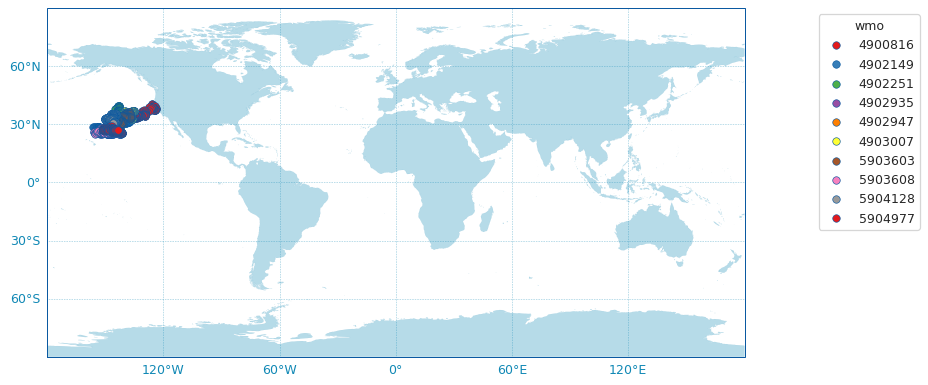

In [22]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True) #This limits the data to the highest quality control flag (QC = 1)
argo_loader

argo_loader.float([5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603, 4903007, 4900816, 4902251]).load() 
argo_loader
argo_loader.plot('trajectory', set_global=True)

#### General Topography of SMILE Bounds

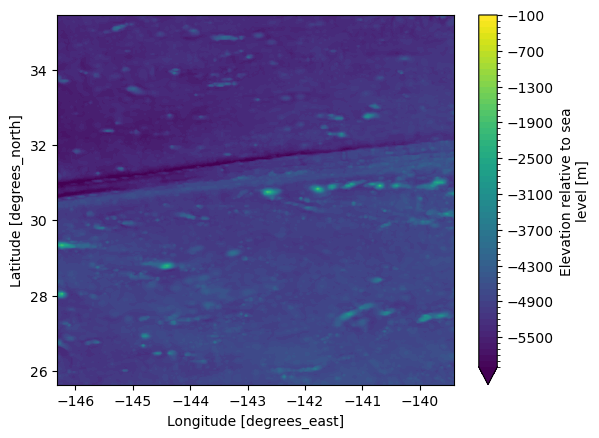

In [23]:
#General Topography of SMILE!
from argopy import TopoFetcher
box = [-146.321753, -139.39713, 25.633673, 35.469333]  # Lon_min, lon_max, lat_min, lat_max
ds = TopoFetcher(box, ds='gebco', stride=[10, 10], cache=True).to_xarray()
ds['elevation'].plot.contourf(levels=np.arange(-6000,0,100), add_colorbar=True, cmap='viridis')

In [24]:
#SMILE Trajectory & My Bounding Regions Defined, I also changed Region #2 lon and lat to actually be in bounds, my guess was off.

![SMILE](http://localhost:8888/files/Documents/Elizabeth's%20Files%202023/DINO%20SIP%20Documents/ARGO-APEX%20Comp%20Project/SMILETrajectories2023-07-20%20115236.png?_xsrf=2%7C5fdeff4c%7C9f24d4f5bd3c52f99f80b495babc715f%7C1687389931)

#### Trajectory, Profile Years, And Map Against Topography Graphs from Argopy

C:\Users\lily\mambaforge\envs\AOS2\lib\site-packages\argopy\plot\plot.py:481: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(**{**defaults, **kwargs}, subplot_kw=subplot_kw)


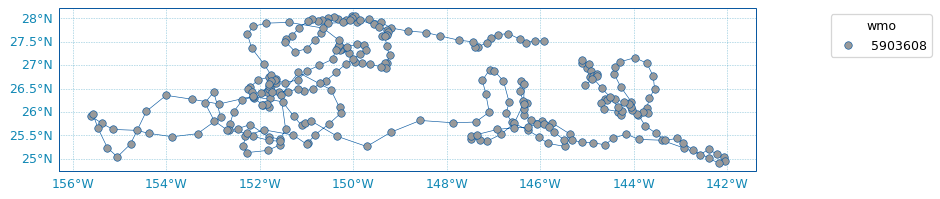

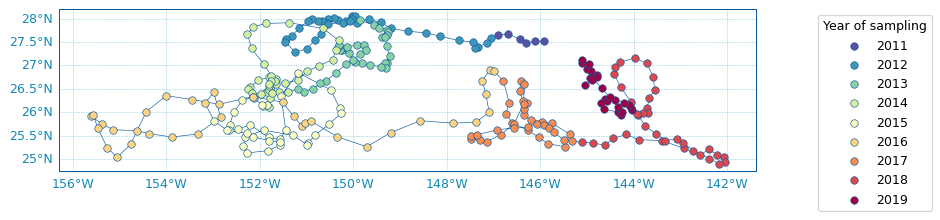

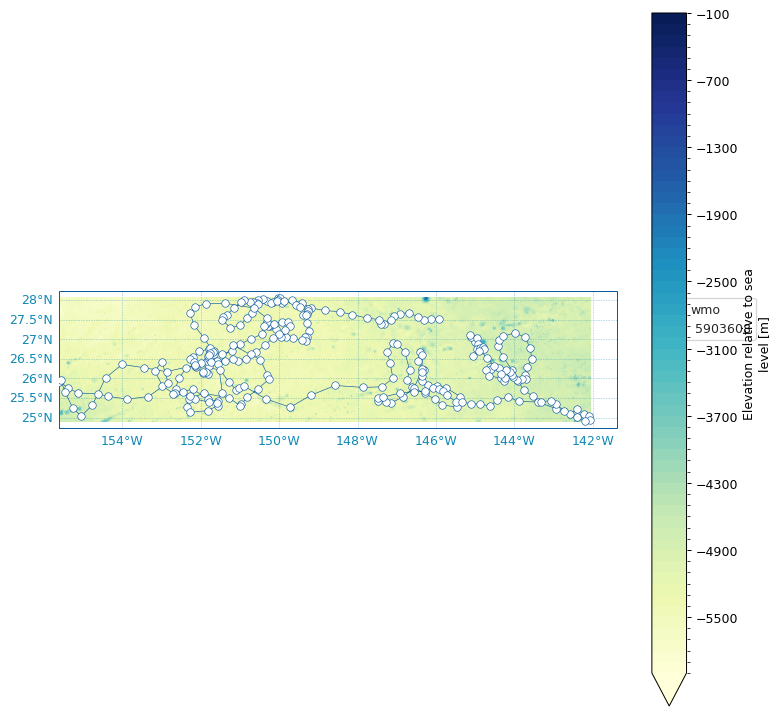

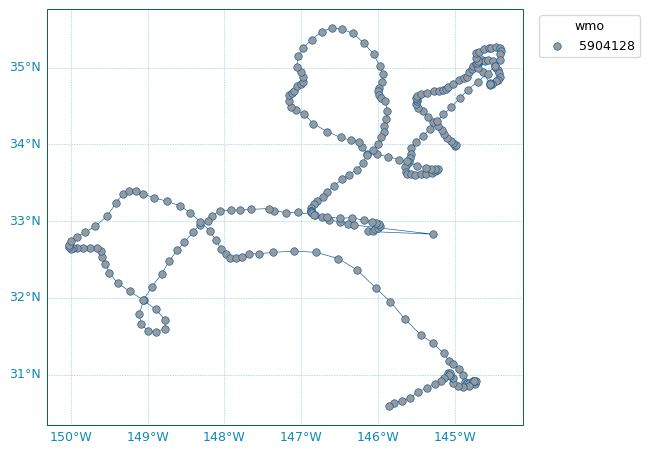

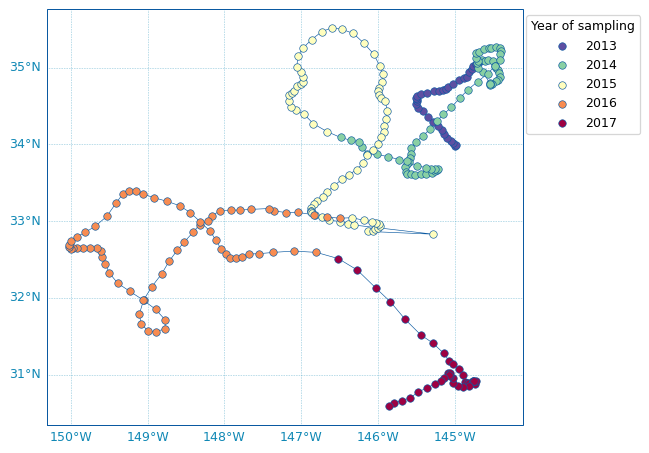

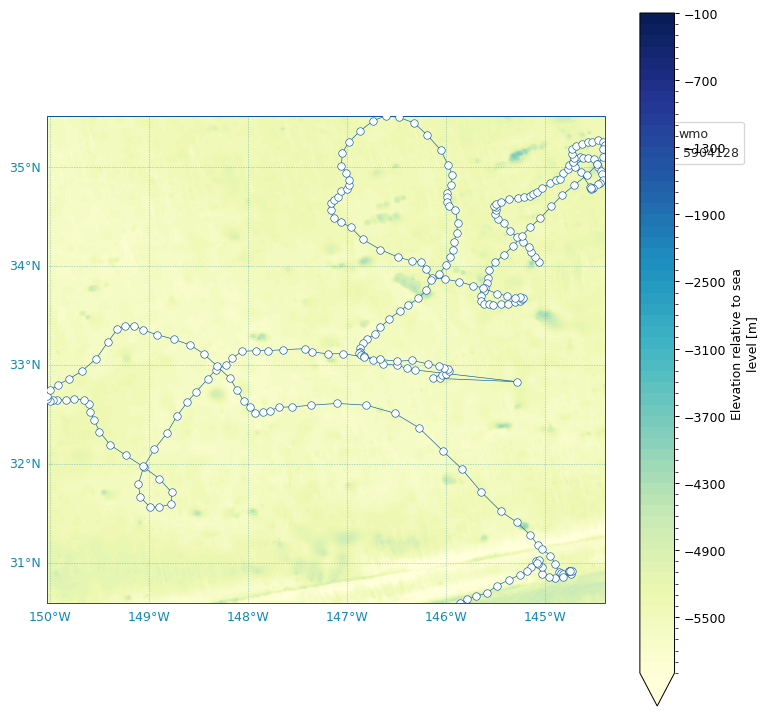

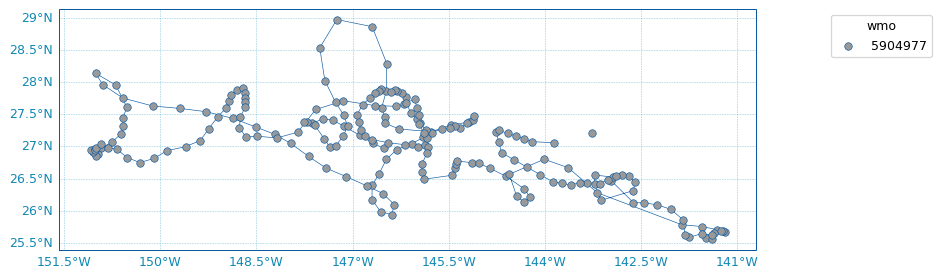

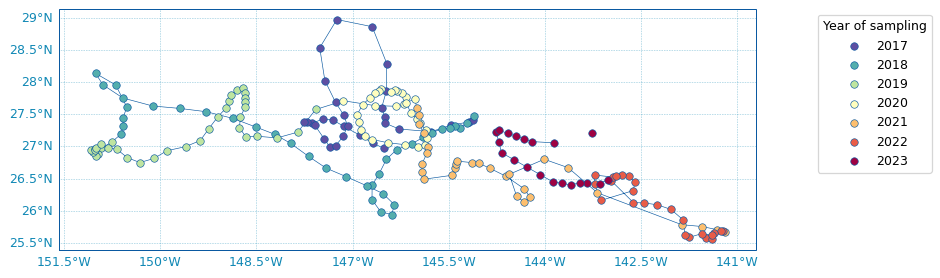

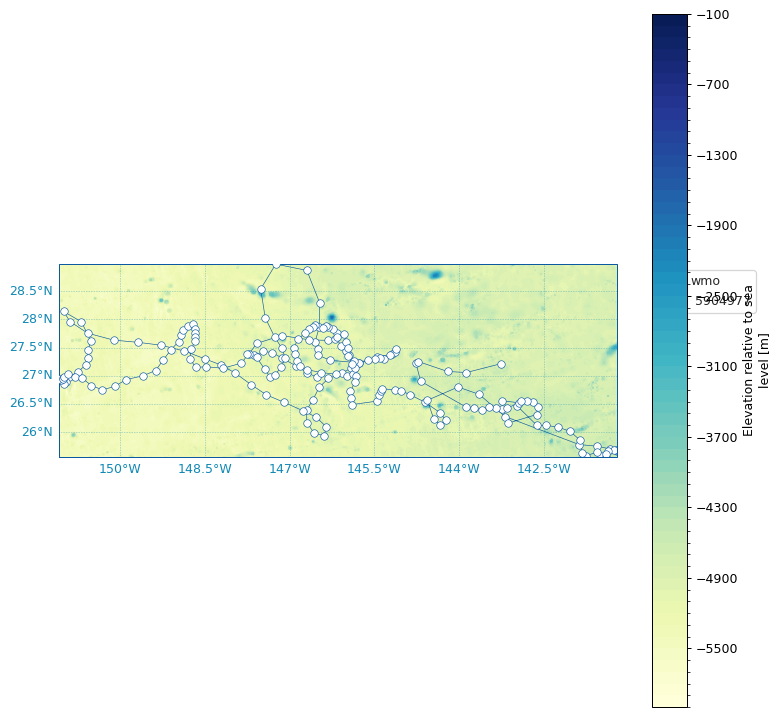

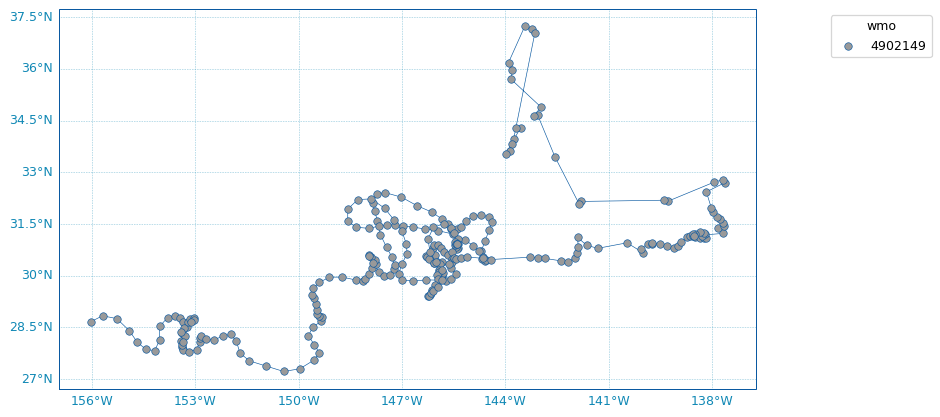

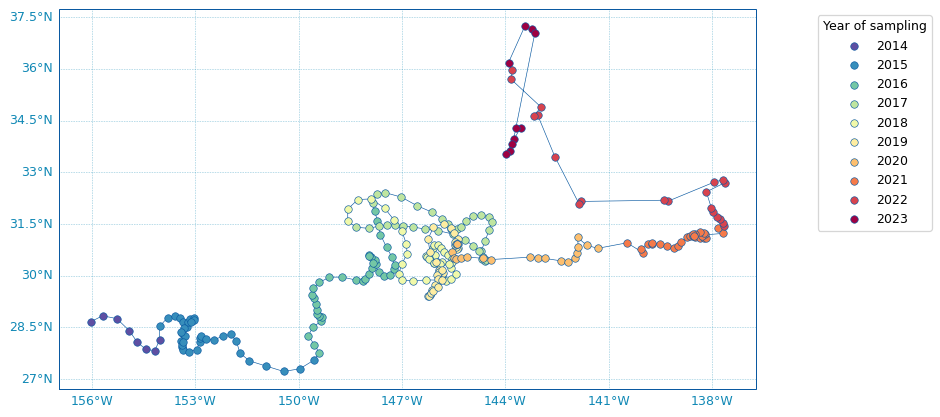

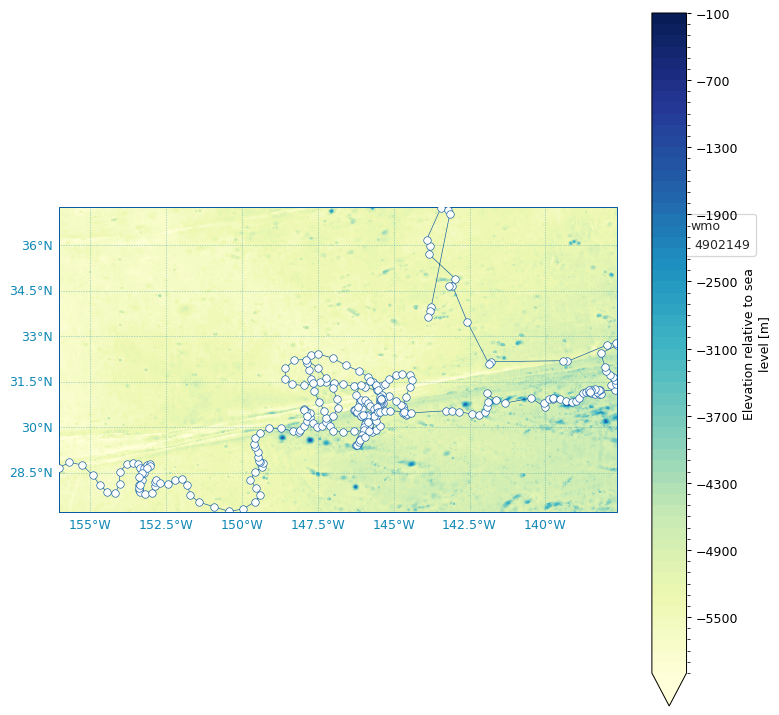

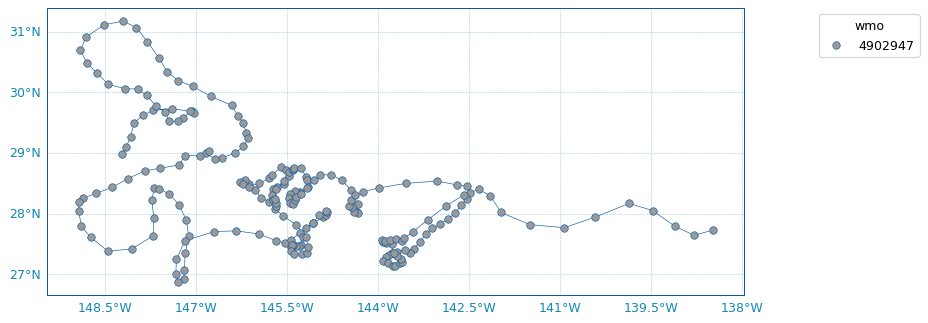

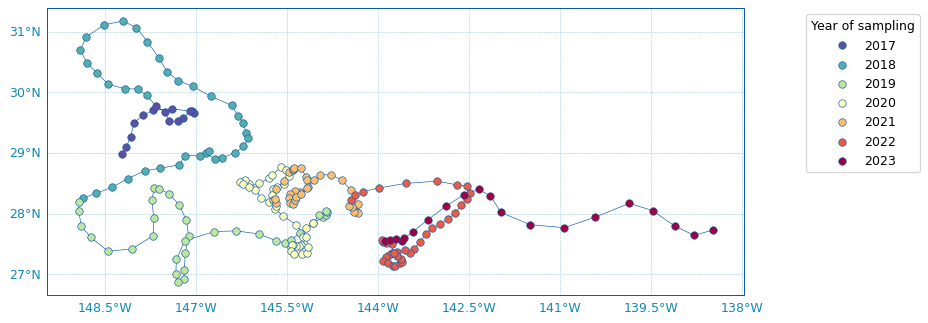

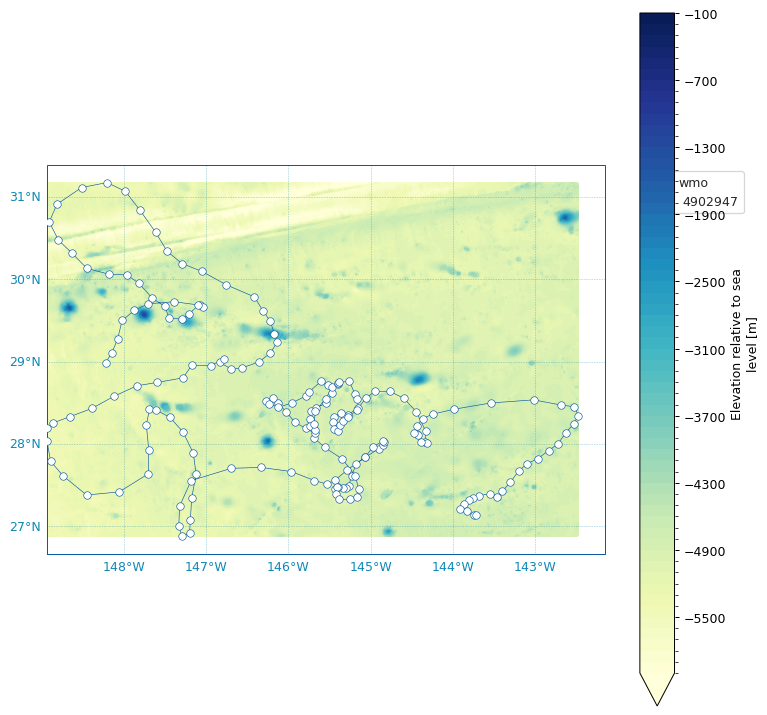

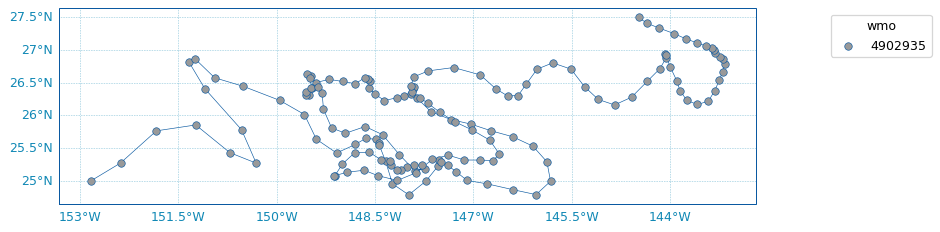

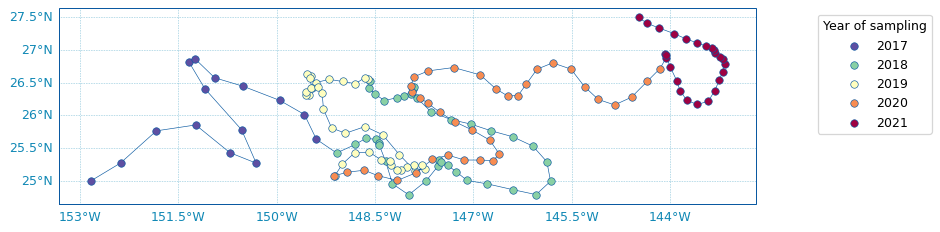

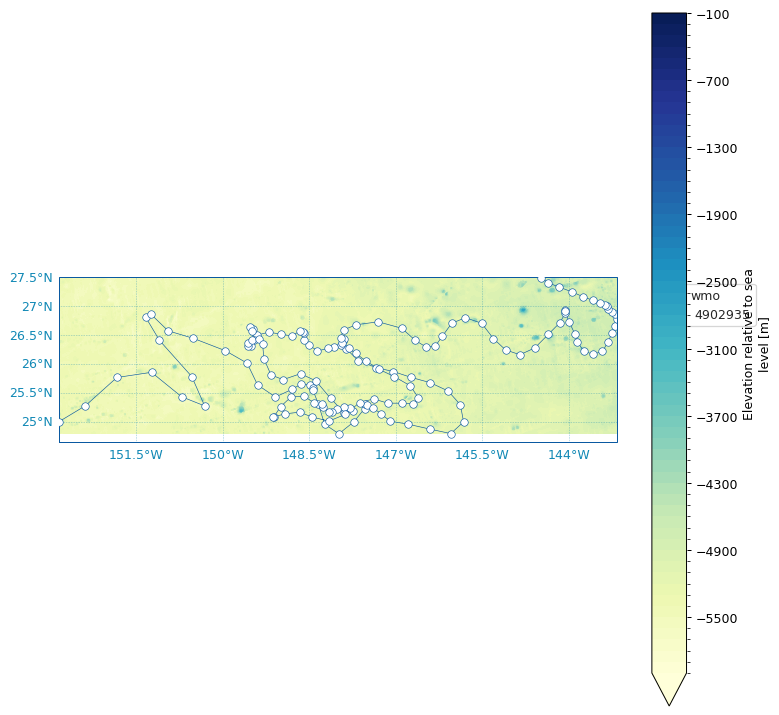

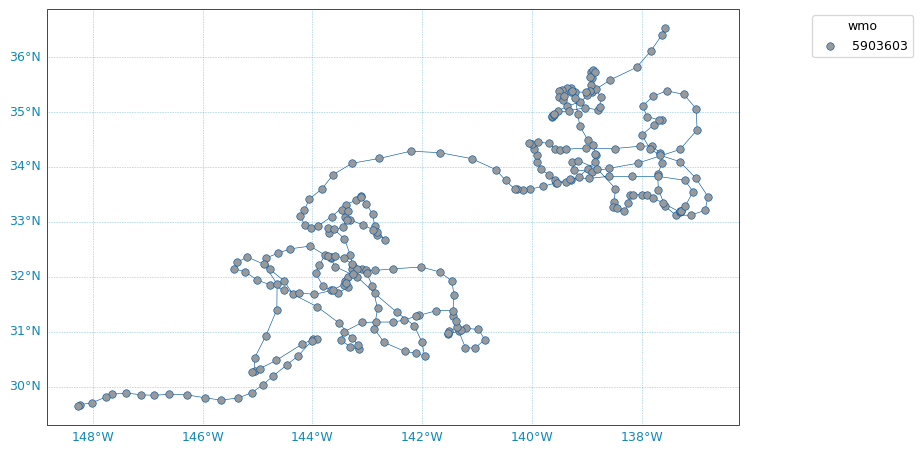

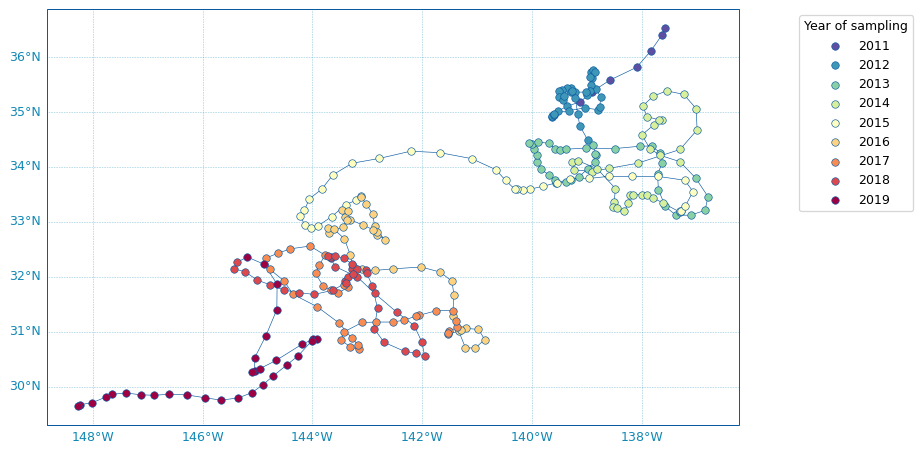

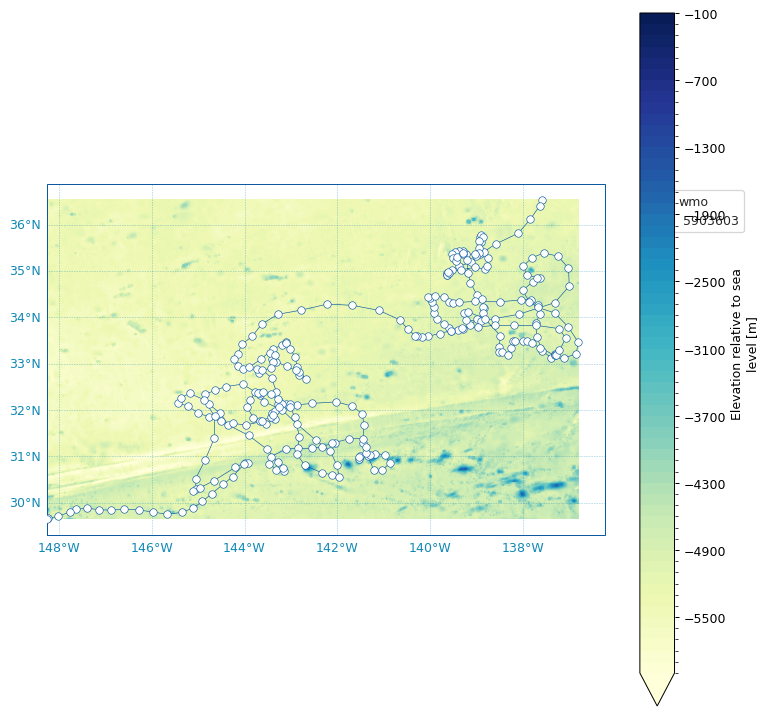

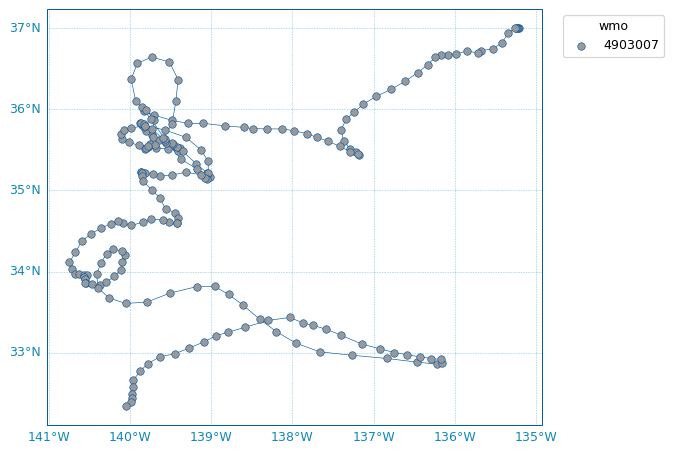

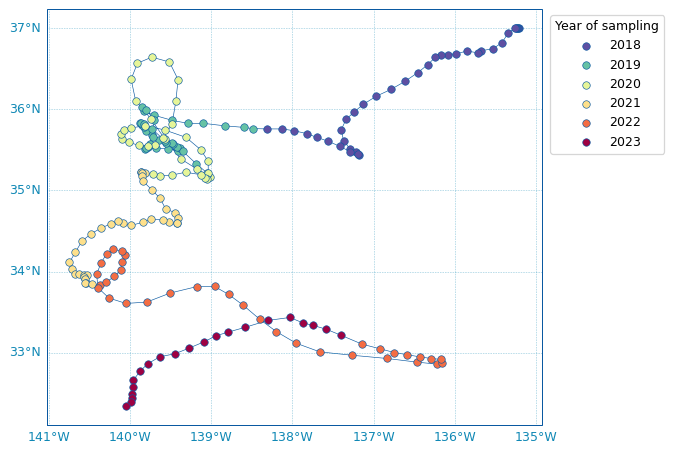

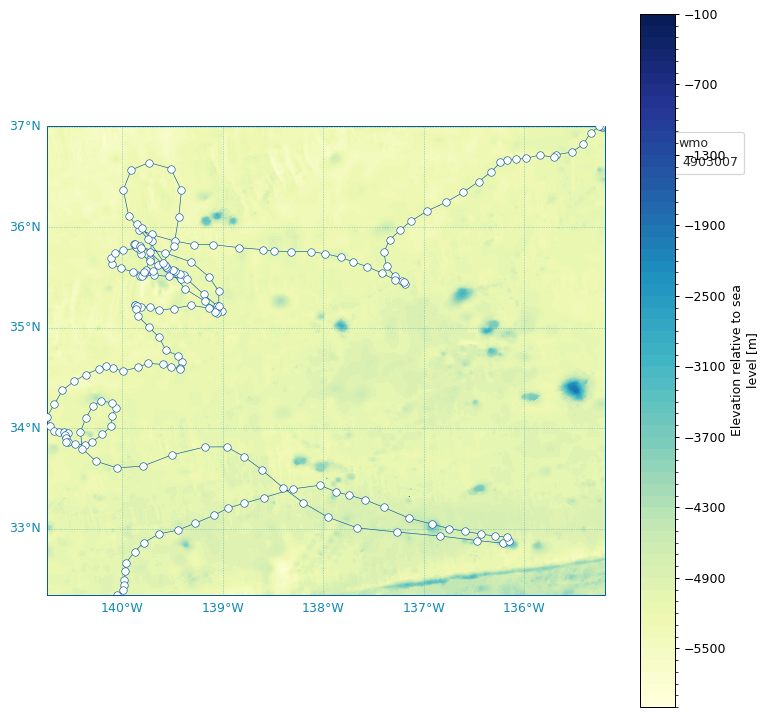

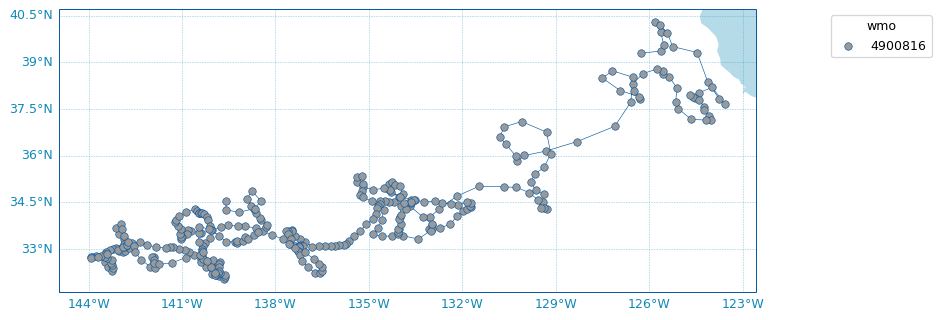

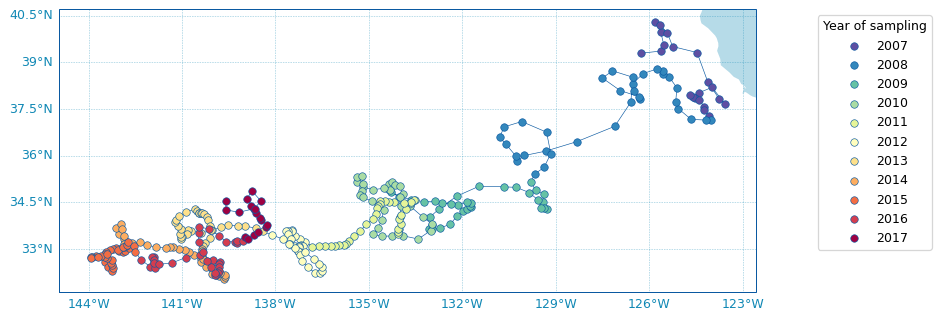

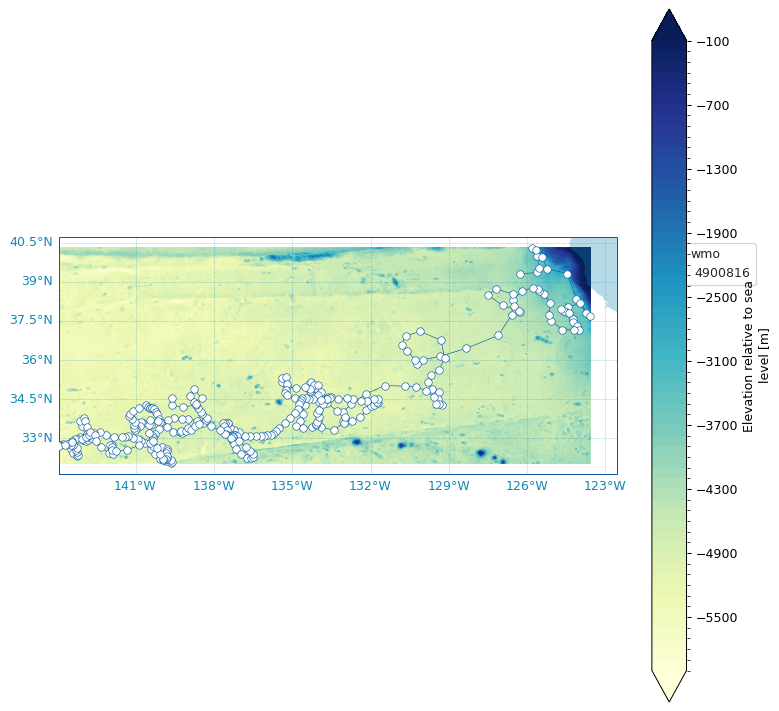

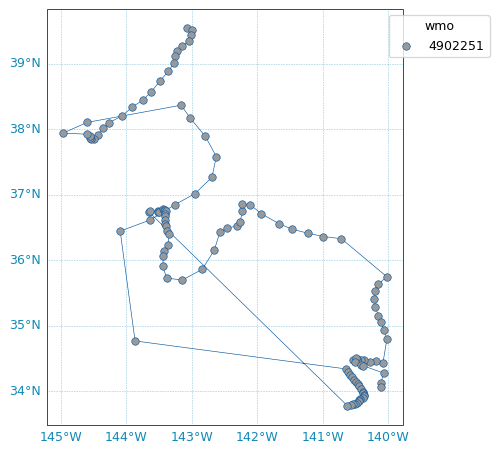

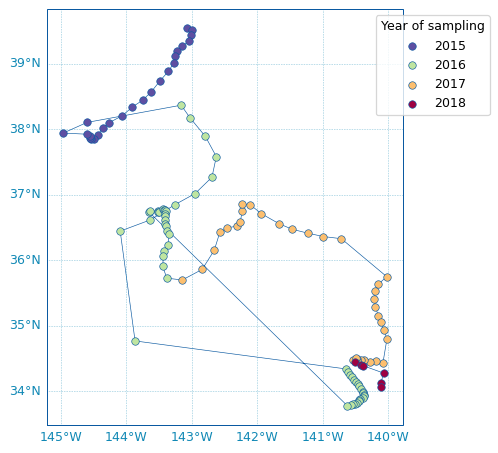

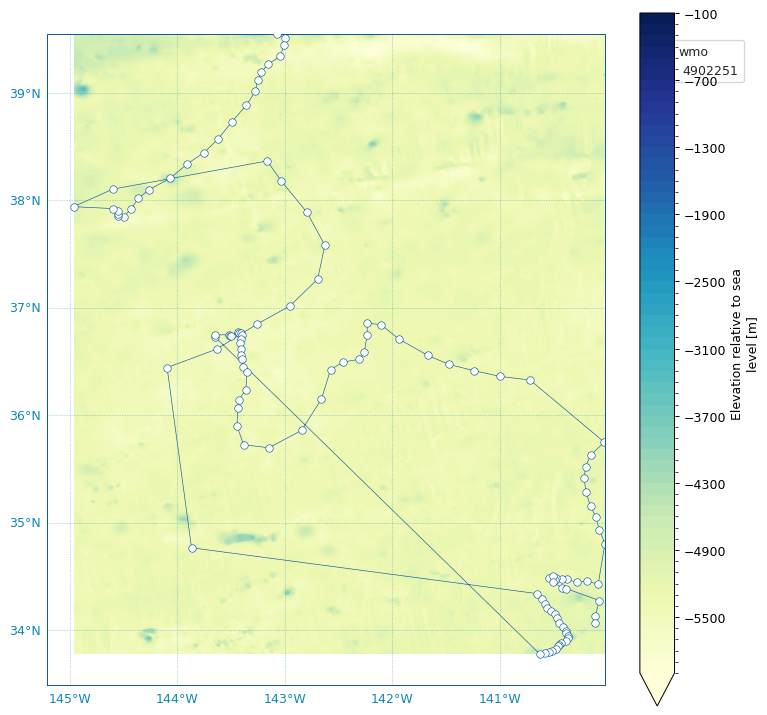

In [25]:
from argopy.plot import scatter_map
from argopy import DataFetcher as ArgoDataFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

for a in [5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603, 4903007, 4900816, 4902251]:
    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    ds = ArgoSet.data.argo.point2profile()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    scatter_map(df)
    ds['year'] = ds['TIME.year']  # Add new variable to the dataset
    scatter_map(ds.isel(N_LEVELS=0),
                hue='year',
                cmap='Spectral_r',
                legend_title='Year of sampling')

    fetcher = ArgoDataFetcher().float(a)
    ds = TopoFetcher(fetcher.domain[0:4], cache=True).to_xarray()
    
    argo_loader = ArgoDataFetcher(src='erddap', parallel=True)
    argo_loader.float(a).load()
    
    fig, ax = argo_loader.plot('trajectory', figsize=(10, 10), cmap='white')
    ds['elevation'].plot.contourf(levels=np.arange(-6000,0,100), ax=ax, add_colorbar=True, cmap='YlGnBu')

In [26]:
#I would like to remove the wmo label from the topography map, and then move them all side-by-side considering they can all share a y-axis.

In [27]:
#Or Maybe just use this graph of my chosen regions + float trajectories and how they overlap!

#### Trajectory Graphs of Each Float W/ Region Bounding Boxes (CTD, My Own, SMILE's), My Own Designed Graphs!

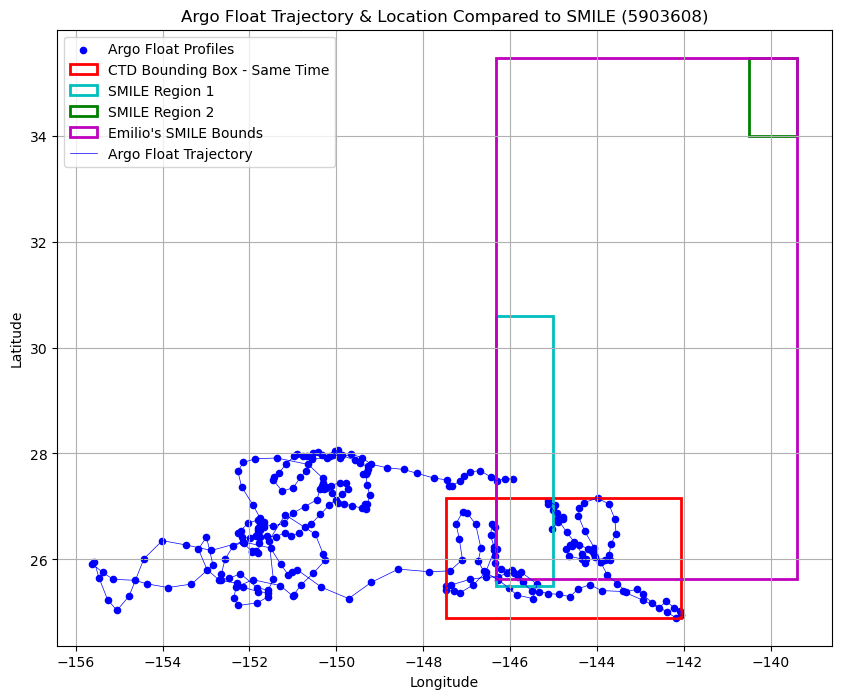

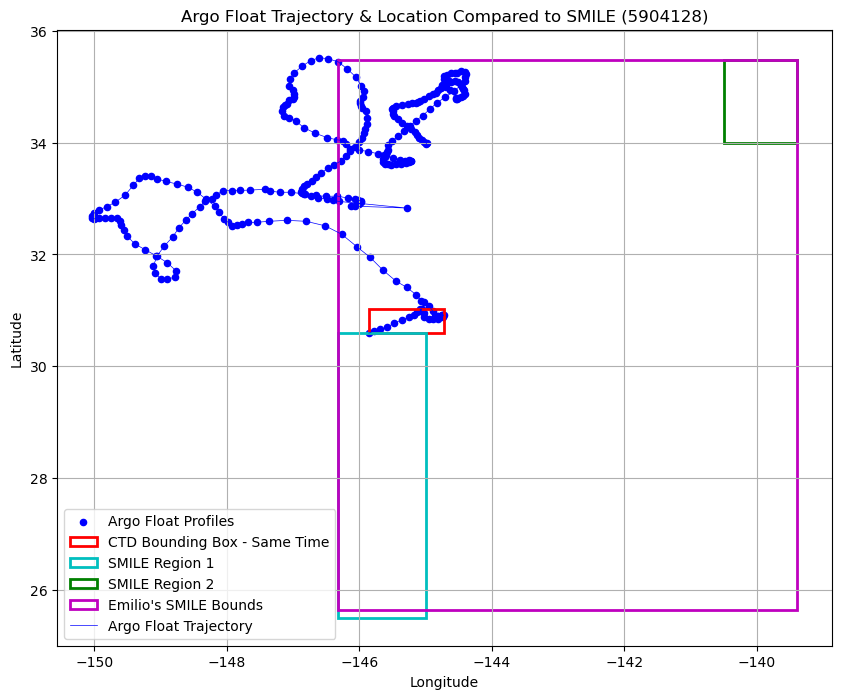

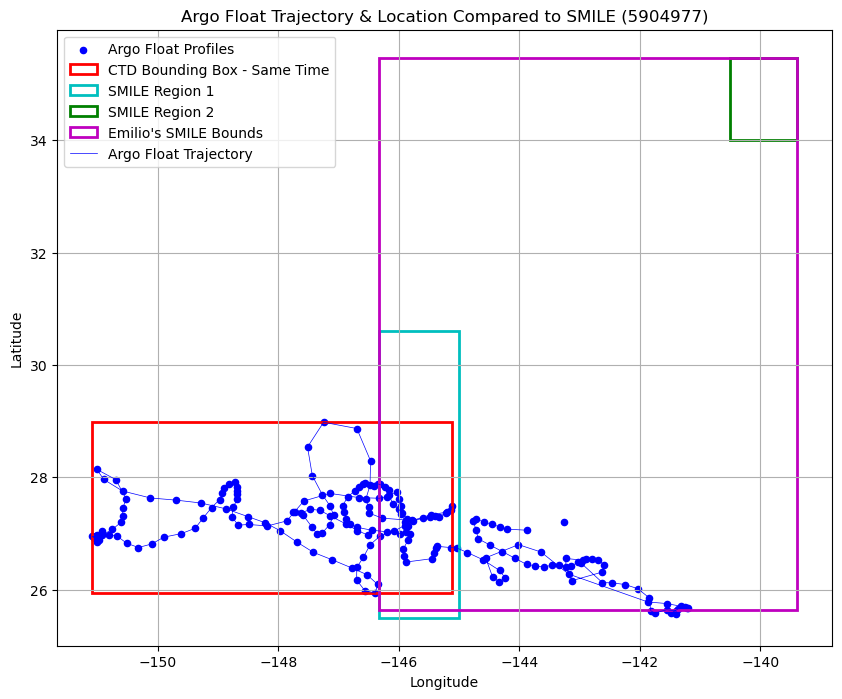

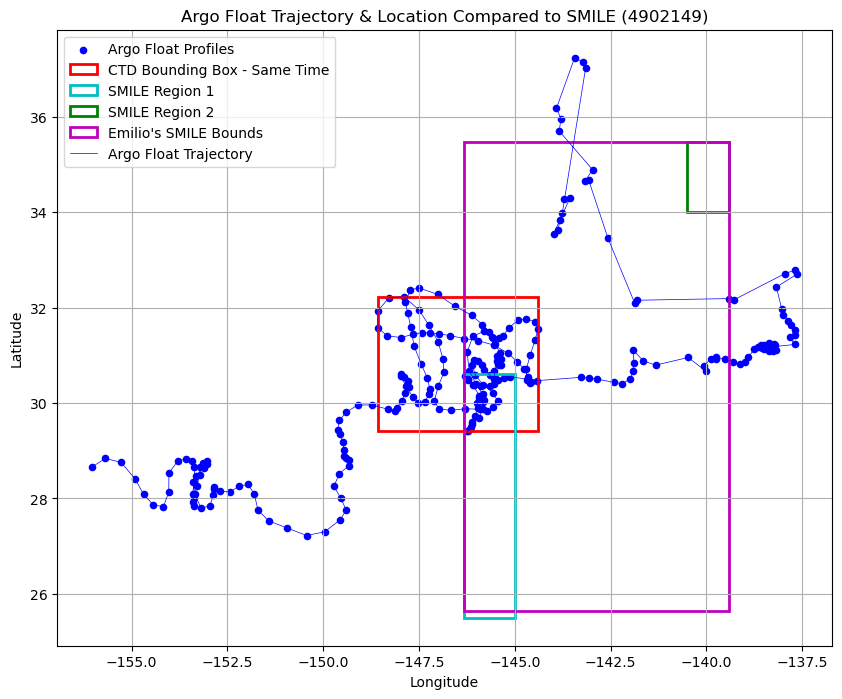

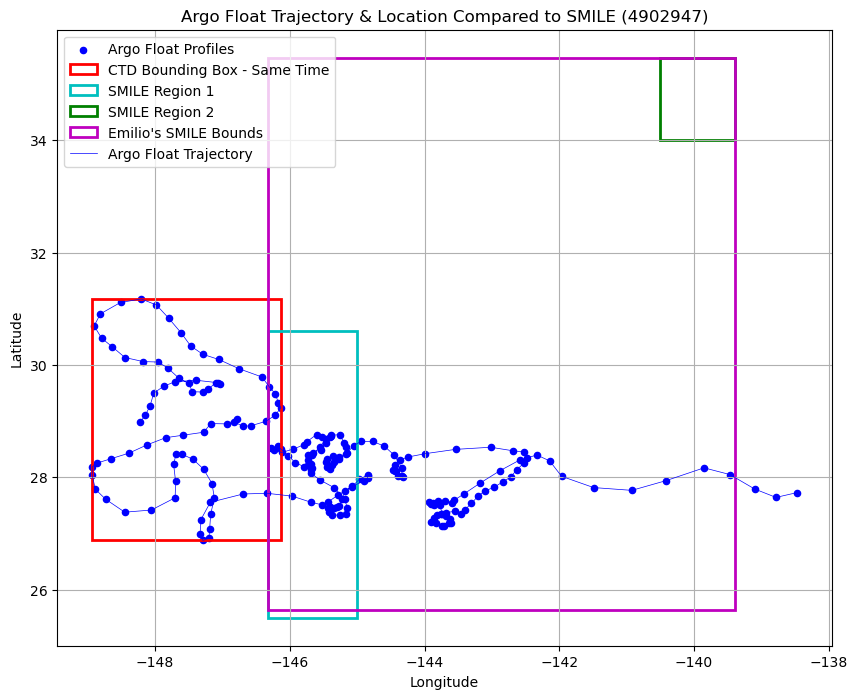

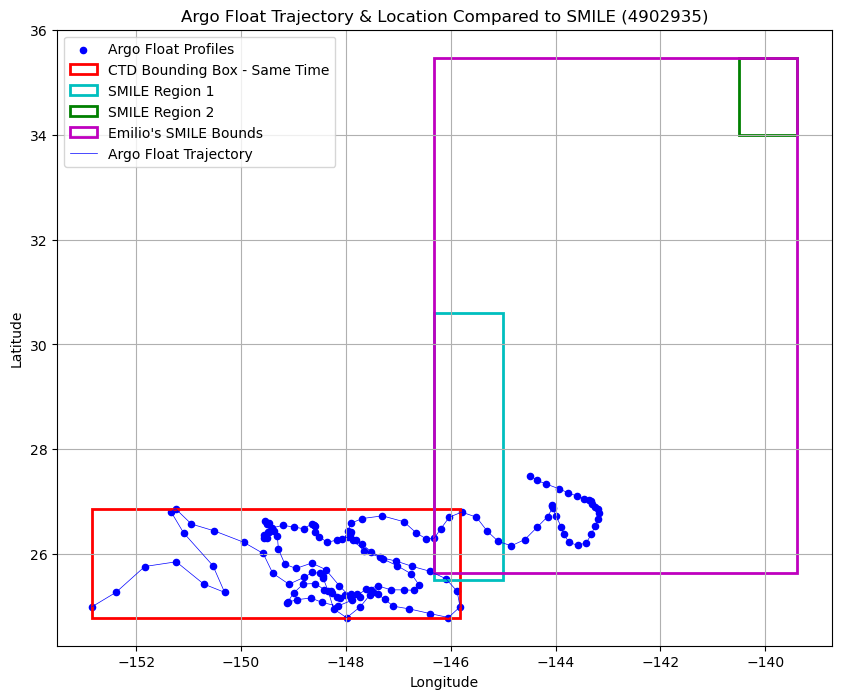

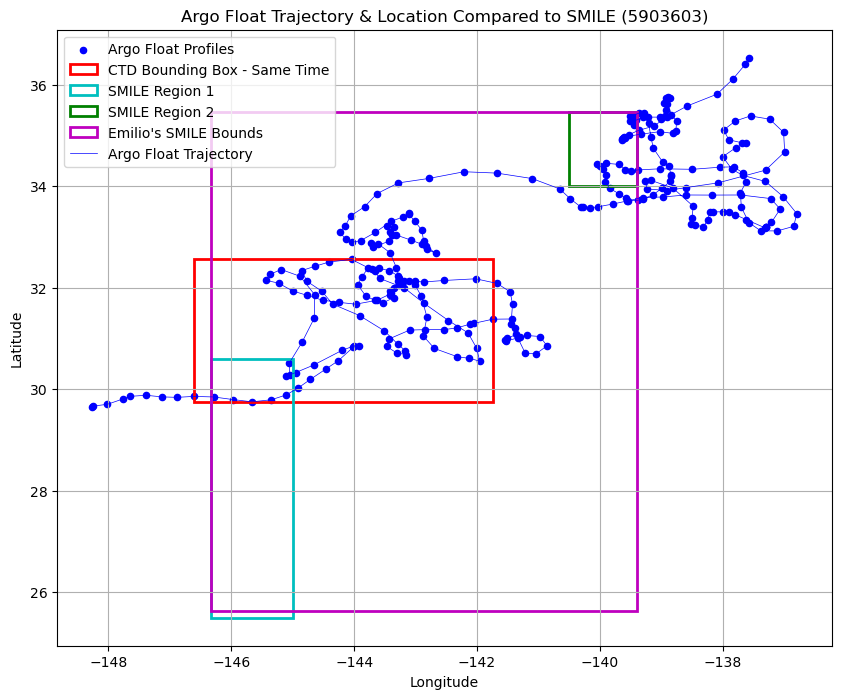

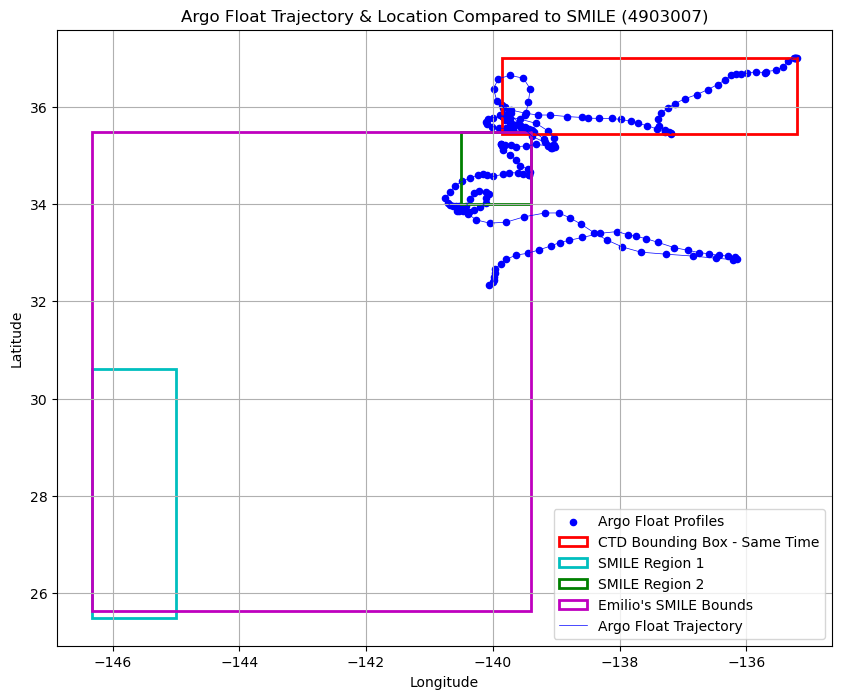

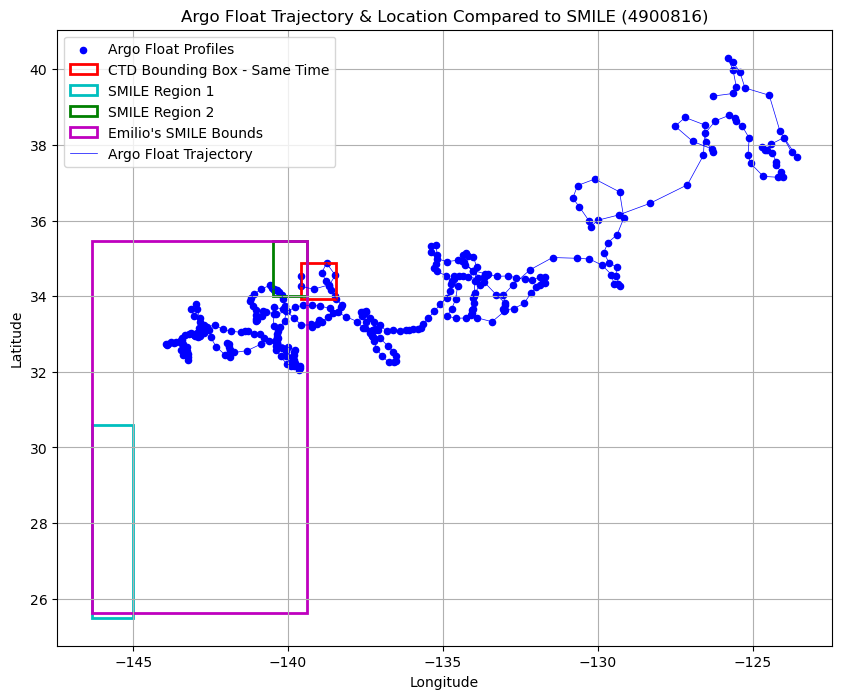

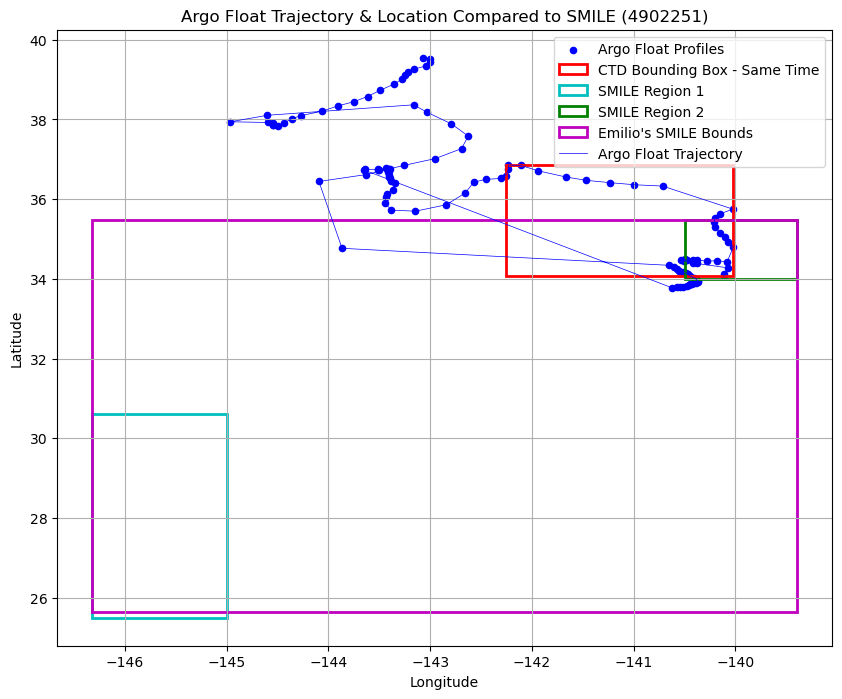

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from argopy import OceanOPSDeployments
from argopy import DataFetcher as ArgoDataFetcher

argo_loader = ArgoDataFetcher(src='erddap', parallel=True) # This limits the data to the highest quality control flag (QC = 1)

sliced_data_dict = {}
a_values = [5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603, 4903007, 4900816, 4902251]

for a in a_values:
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2019-09-01'))
    sliced_data_dict[a] = sliced_data

    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    fig, ax = plt.subplots(figsize=(10, 8))

    # Scatter plot for Argo Floats
    ax.scatter(df.longitude, df.latitude, s=20, c='b', marker='o', label='Argo Float Profiles')

    # Get the max and min latitudes and longitudes from the CTD bounds
    max_lat_1 = sliced_data.LATITUDE.max().values
    min_lat_1 = sliced_data.LATITUDE.min().values
    max_lon_1 = sliced_data.LONGITUDE.max().values
    min_lon_1 = sliced_data.LONGITUDE.min().values

    # Add bounding box to the map
    rect1 = patches.Rectangle((min_lon_1, min_lat_1), max_lon_1 - min_lon_1, max_lat_1 - min_lat_1,
                              linewidth=2, edgecolor='r', facecolor='none', label='CTD Bounding Box - Same Time')
    ax.add_patch(rect1)

    # Get the max and min latitudes and longitudes from the CTD bounds
    max_lat_2 = 30.6
    min_lat_2 = 25.5
    max_lon_2 = -145
    min_lon_2 = -146.322

    rect2 = patches.Rectangle((min_lon_2, min_lat_2), max_lon_2 - min_lon_2, max_lat_2 - min_lat_2,
                              linewidth=2, edgecolor='c', facecolor='none', label='SMILE Region 1')

    # Add another rectangular bounding box
    
    ax.add_patch(rect2)

    #Get the max and min latitudes and longitudes from my own bounds of Region #1
    max_lat_3 = 35.469333
    min_lat_3 = 34.0
    max_lon_3 = -139.39713
    min_lon_3 = -140.5
    
    rect3 = patches.Rectangle((min_lon_3, min_lat_3), max_lon_3 - min_lon_3, max_lat_3 - min_lat_3,
                             linewidth=2, edgecolor='g', facecolor='none', label='SMILE Region 2')

    ax.add_patch(rect3)

    #Get the max and min latitudes and longitudes from Emilio's SMILE bounds!
    max_lat_4 = 35.469333
    min_lat_4 = 25.633673
    max_lon_4 = -139.39713
    min_lon_4 = -146.321753
    
    rect4 = patches.Rectangle((min_lon_4, min_lat_4), max_lon_4 - min_lon_4, max_lat_4 - min_lat_4,
                             linewidth=2, edgecolor='m', facecolor='none', label=("Emilio's SMILE Bounds"))

    ax.add_patch(rect4)

    #Connect the dots with a line, because the data is already in timely order, if it was NOT we would have to use different code than this!
    ax.plot(df.longitude, df.latitude, c='b', linestyle='-', linewidth=.5, label='Argo Float Trajectory')

    ax.set_title(f'Argo Float Trajectory & Location Compared to SMILE ({a})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.legend()

    ax.grid()

    plt.show()  # Show the map and bounding box for each 'a' value

### Part #3: Graphing CTD Data of ARGO Floats Similar to SMILE

#### This is CTD data of one profile of each float, although note most don't have descending values so these are WRONG!

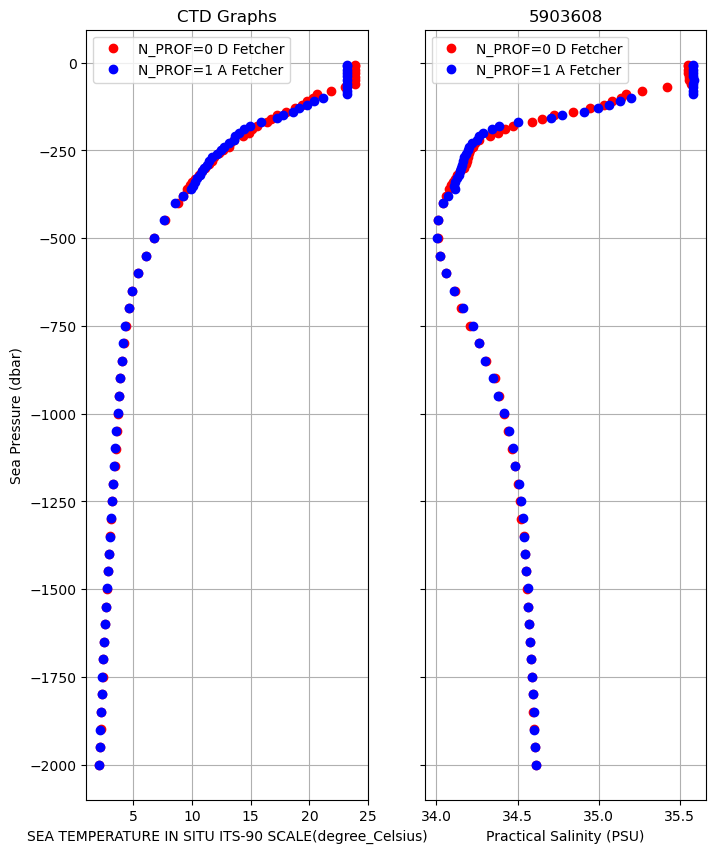

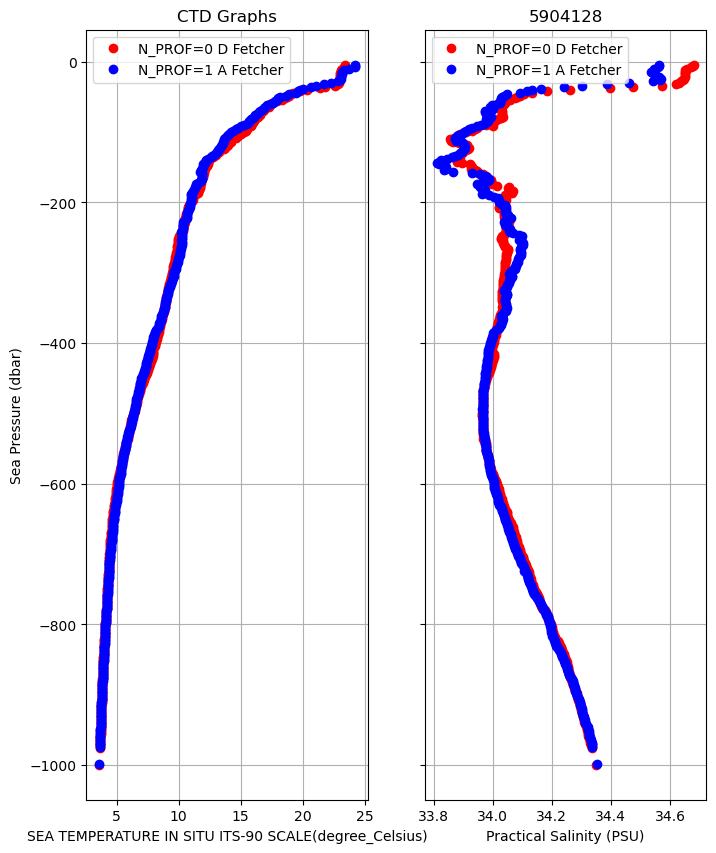

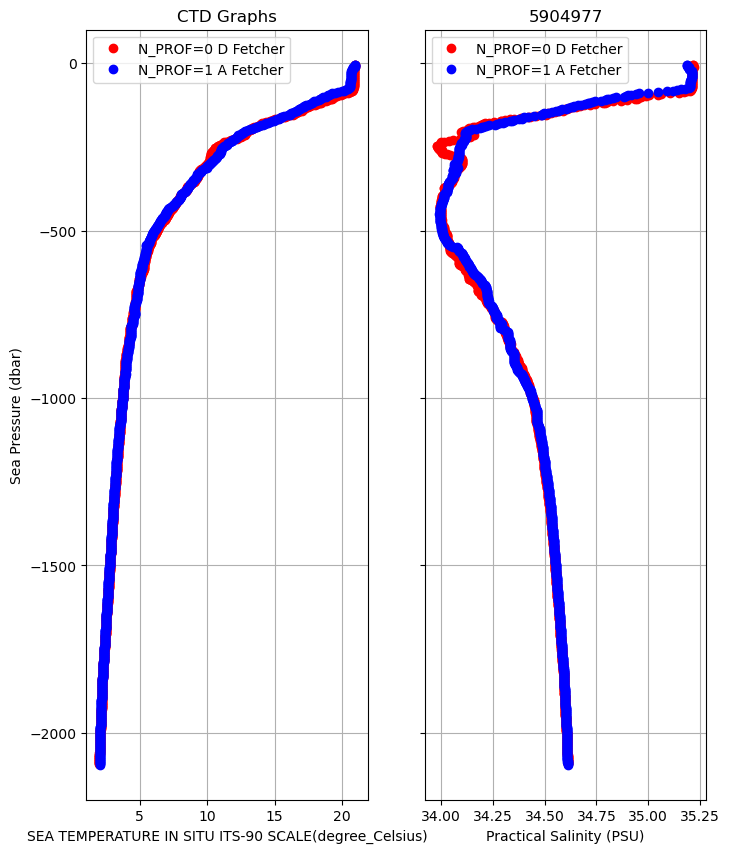

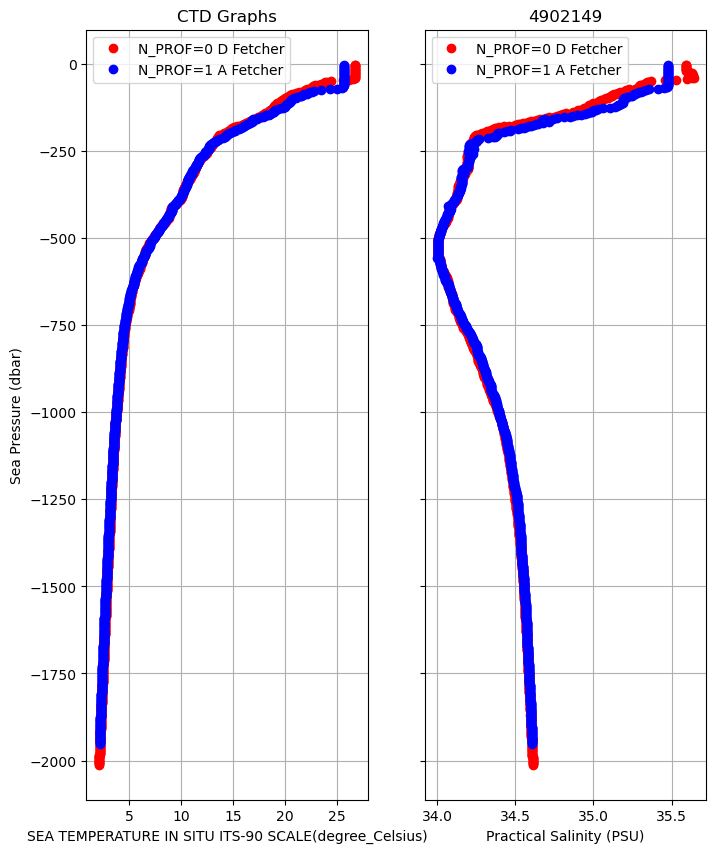

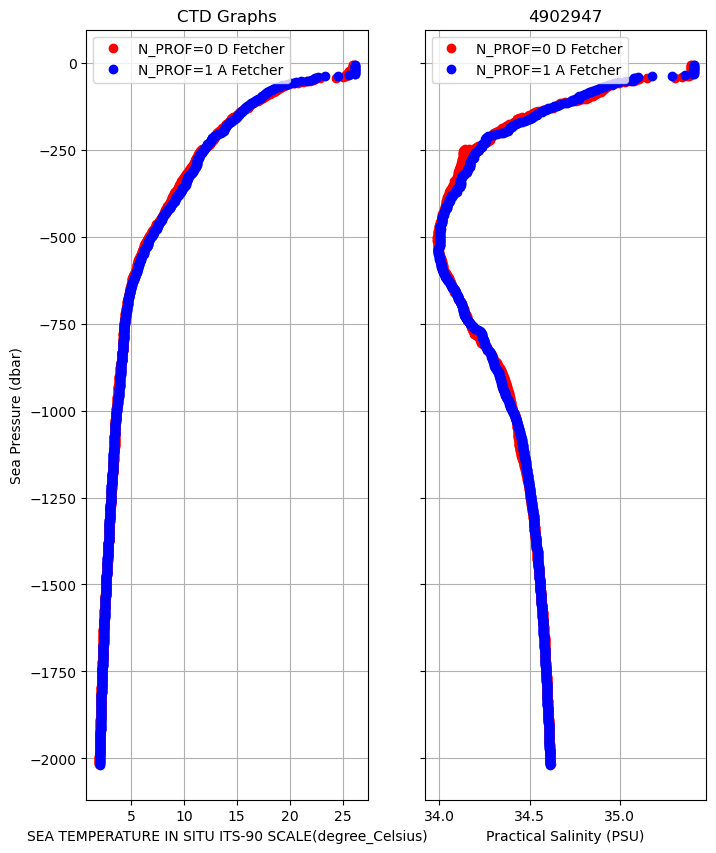

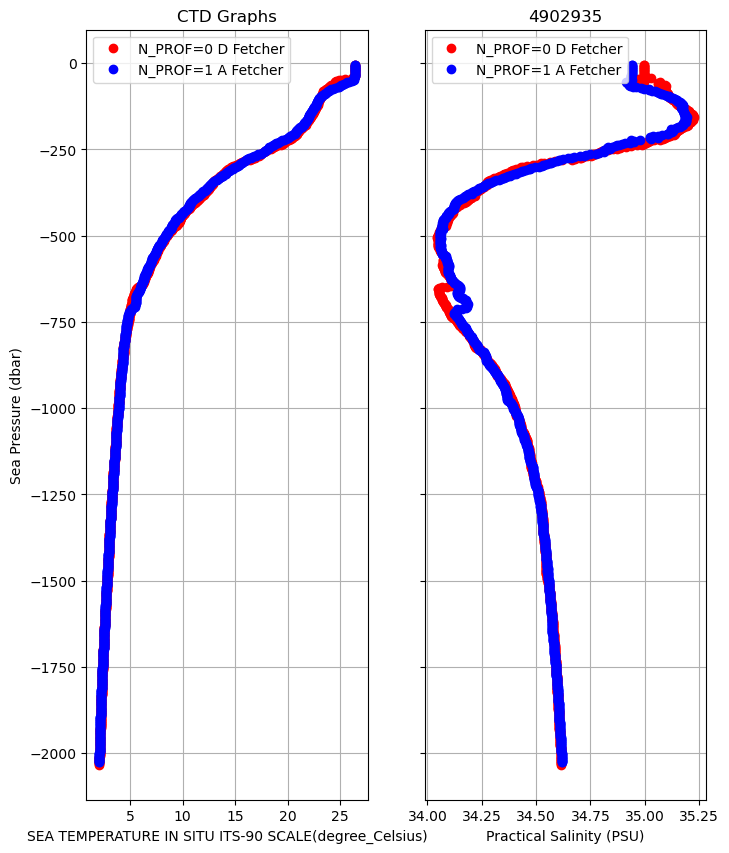

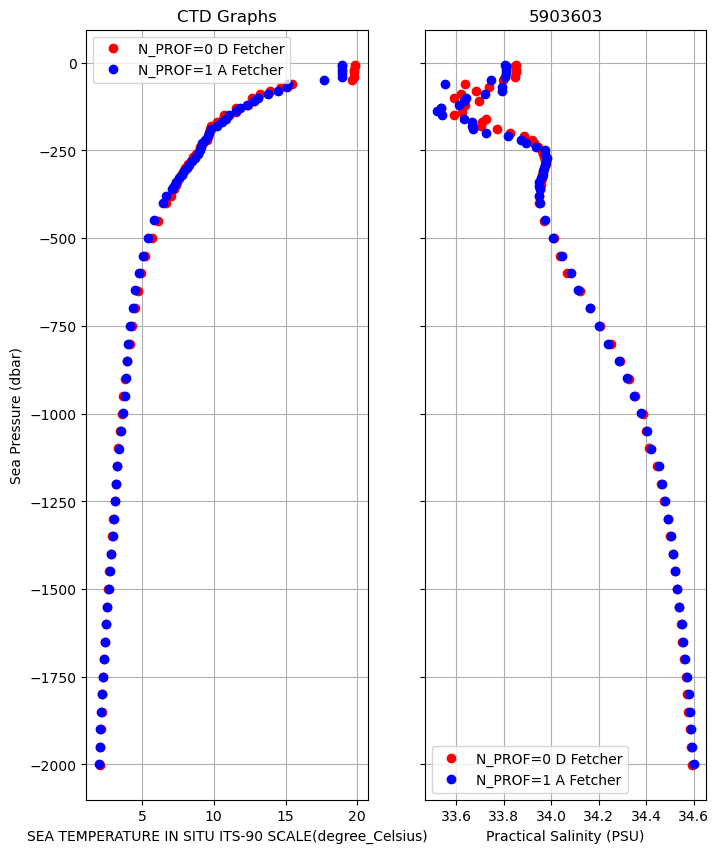

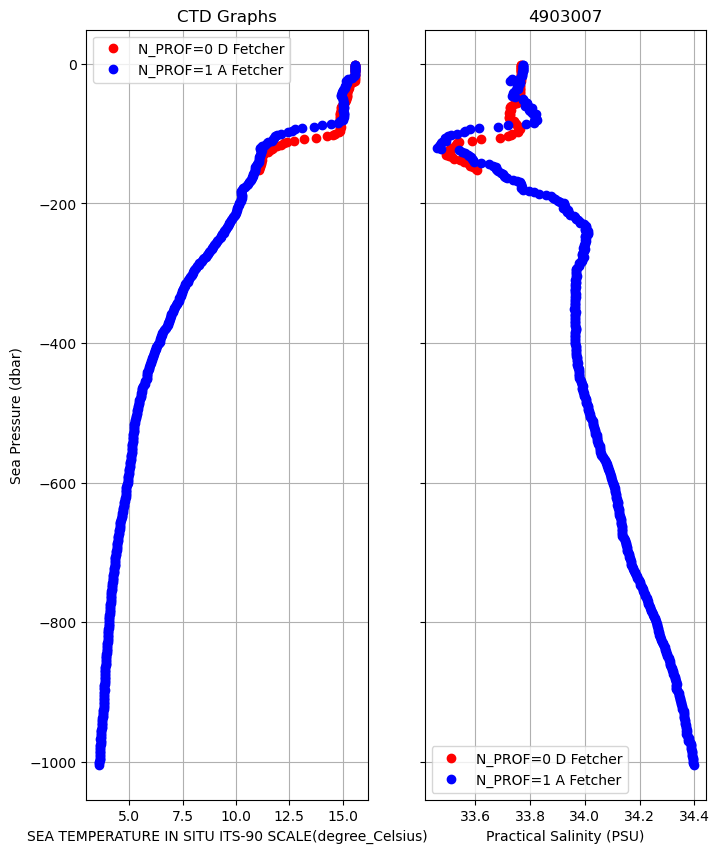

In [29]:
for a in [5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603, 4903007]:
    apDS = argo_loader.float([a]).load().data
    data = apDS.argo.point2profile()
    data

    fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True) 
    #Temperature
    ax[0].plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
    ax[0].plot(data.TEMP[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
    ax[0].set_xlabel(f"{data['TEMP'].attrs['long_name']}({data['TEMP'].attrs['units']})") 
    ax[0].set_ylabel(f"{data['PRES'].attrs['long_name']} (dbar)")
    ax[0].set_title("CTD Graphs")
    ax[0].grid()
    ax[0].legend();
    #Salinity
    ax[1].plot(data.PSAL[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
    ax[1].plot(data.PSAL[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
    ax[1].set_title(a)
    ax[1].set_xlabel('Practical Salinity (PSU)')
    ax[1].grid()
    ax[1].legend();

#### This was my tester graph of the correct time range profiles of one float by manual selection!

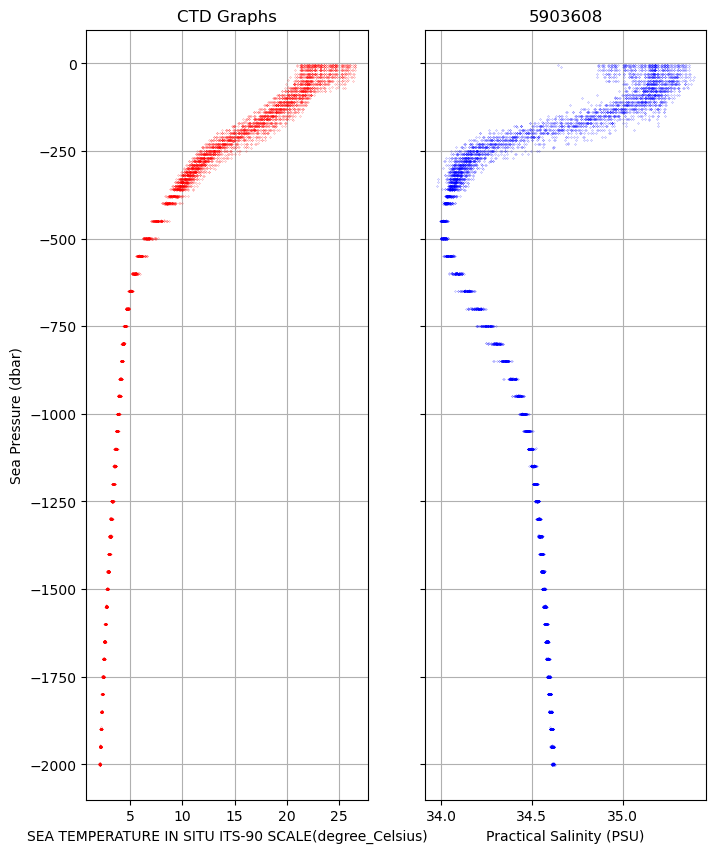

In [30]:
apDS = argo_loader.float(5903608).load().data
data1 = apDS.argo.point2profile()
data = data1.isel(N_PROF=slice(192, 286))

fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True) 
#Temperature
ax[0].plot(data.TEMP,-data.PRES,'ro', markersize=.15, label='N_PROF= all in 2017-2019 A Fetcher')
ax[0].set_xlabel(f"{data['TEMP'].attrs['long_name']}({data['TEMP'].attrs['units']})") 
ax[0].set_ylabel(f"{data['PRES'].attrs['long_name']} (dbar)")
ax[0].set_title("CTD Graphs")
ax[0].grid()
#Salinity
ax[1].plot(data.PSAL,-data.PRES,'bo', markersize=.15, label='N_PROF= all in 2017-2019 A Fetcher')
ax[1].set_title('5903608')
ax[1].set_xlabel('Practical Salinity (PSU)')
ax[1].grid()

#### This is all CTD profiles of floats in the SMILE lat lon bounds + same time stamp (MOST IMPORTANT)!

In [34]:
sliced_data_list = []
for a in [5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603, 4903007, 4900816, 4902251]:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2019-09-01'))
    sliced_data_list.append(sliced_data)

In [35]:
sliced_data_dict = {}
a_values = [5903608, 5904128, 5904977, 4902149, 4902947, 4902935, 5903603, 4903007, 4900816, 4902251]
for a in a_values:
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2019-09-01'))
    sliced_data_dict[a] = sliced_data

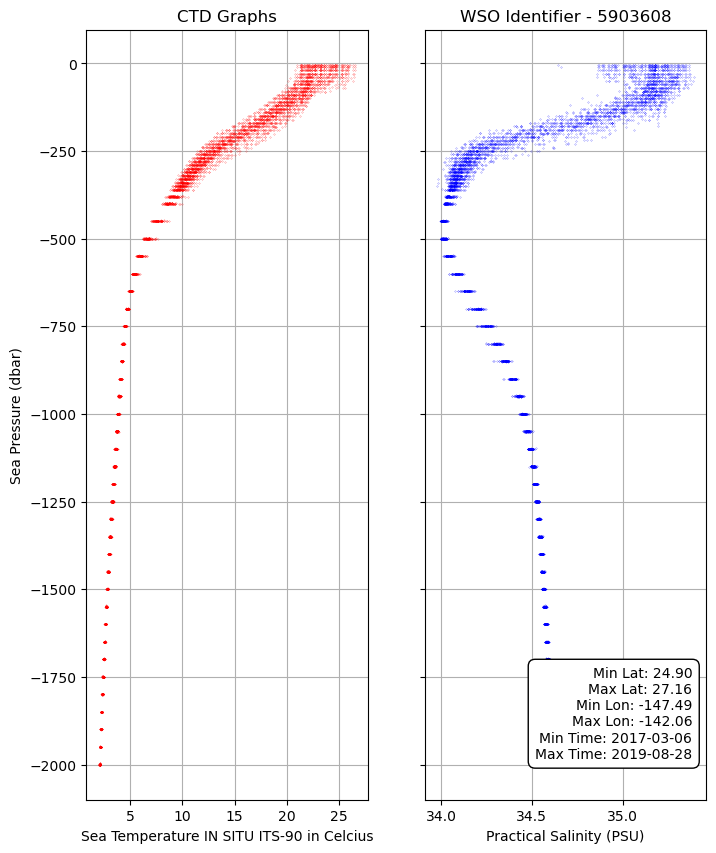

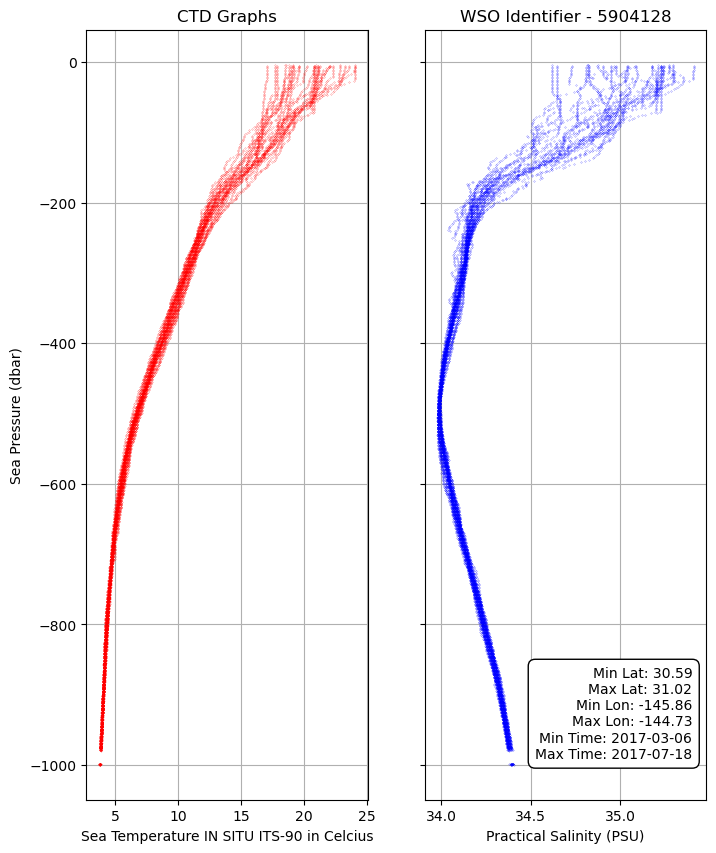

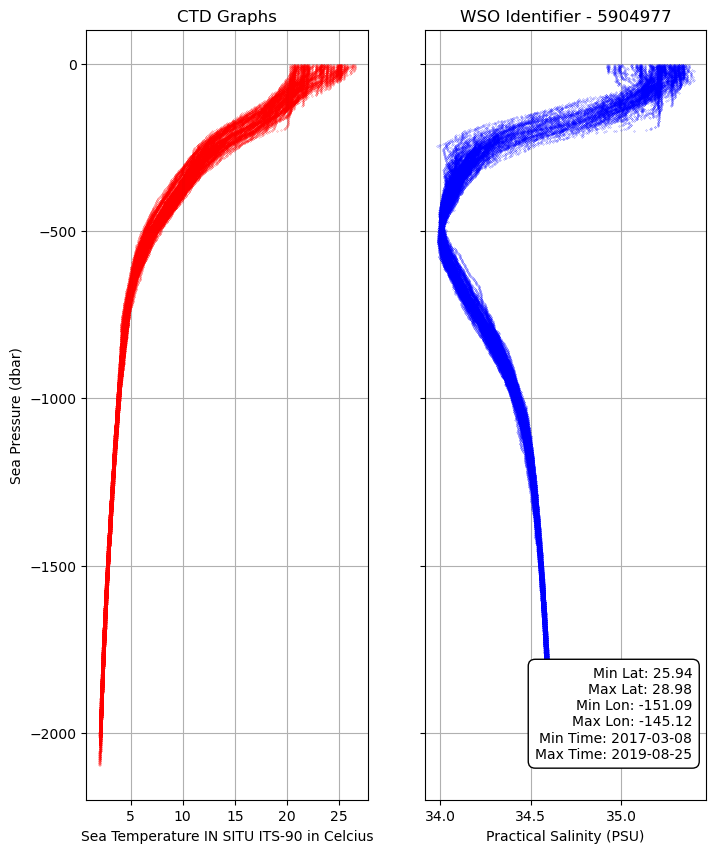

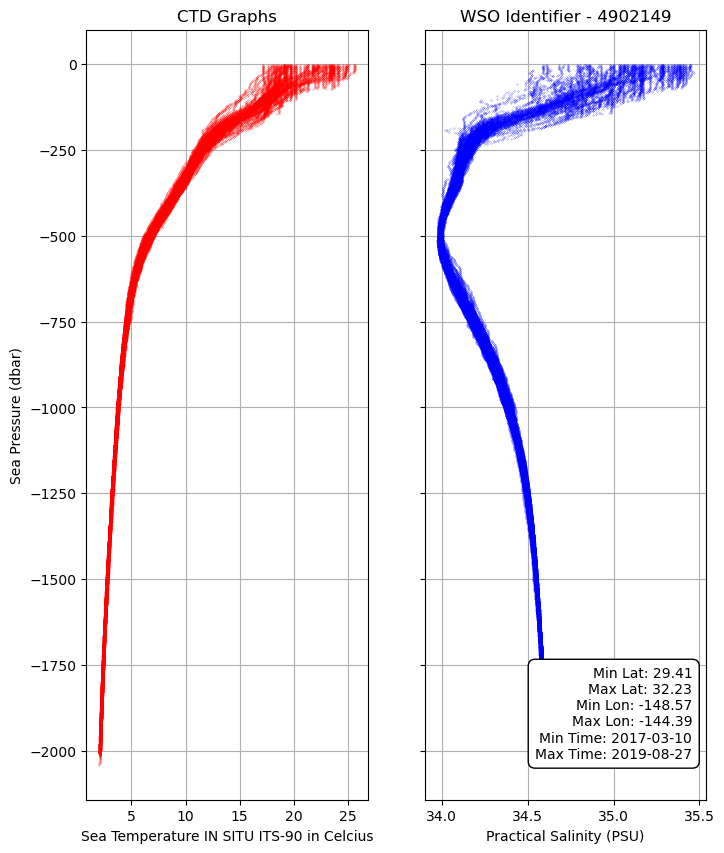

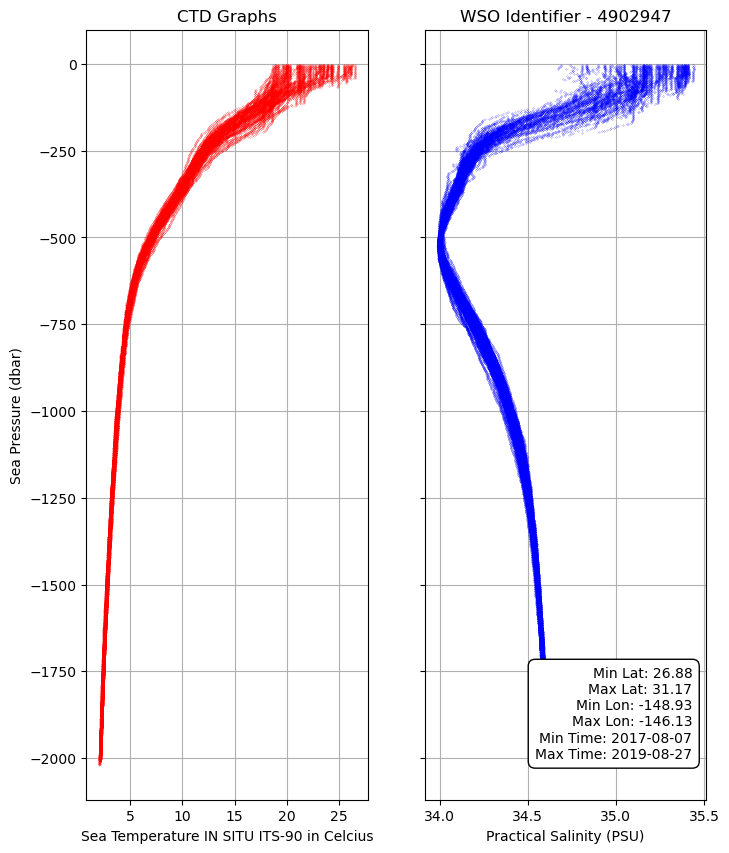

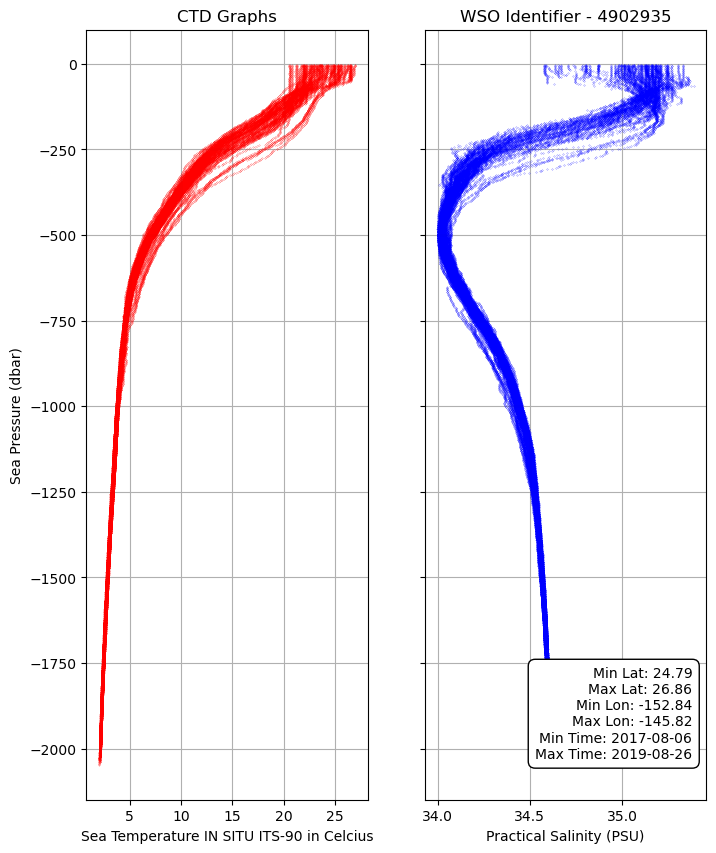

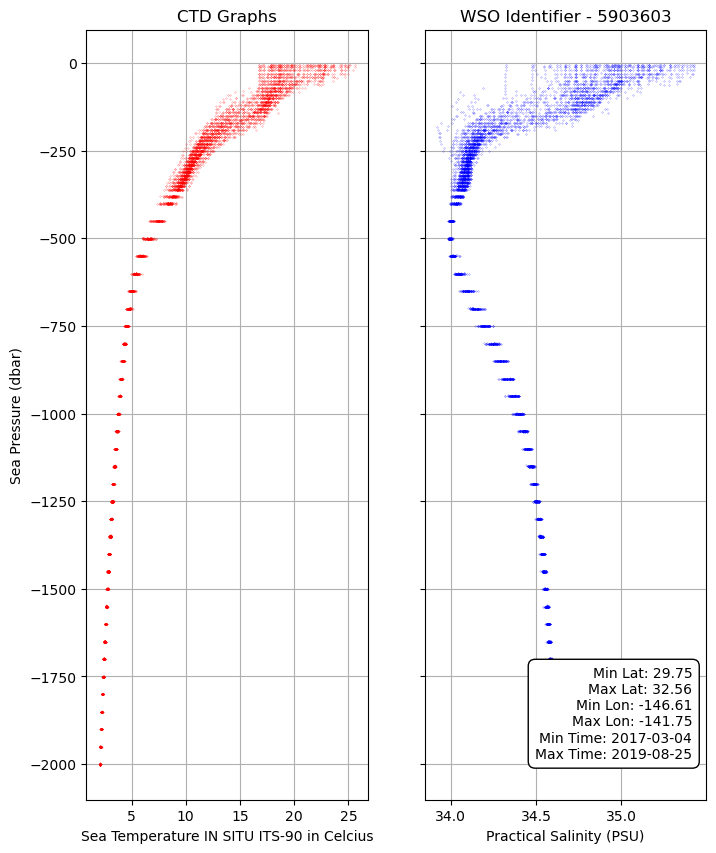

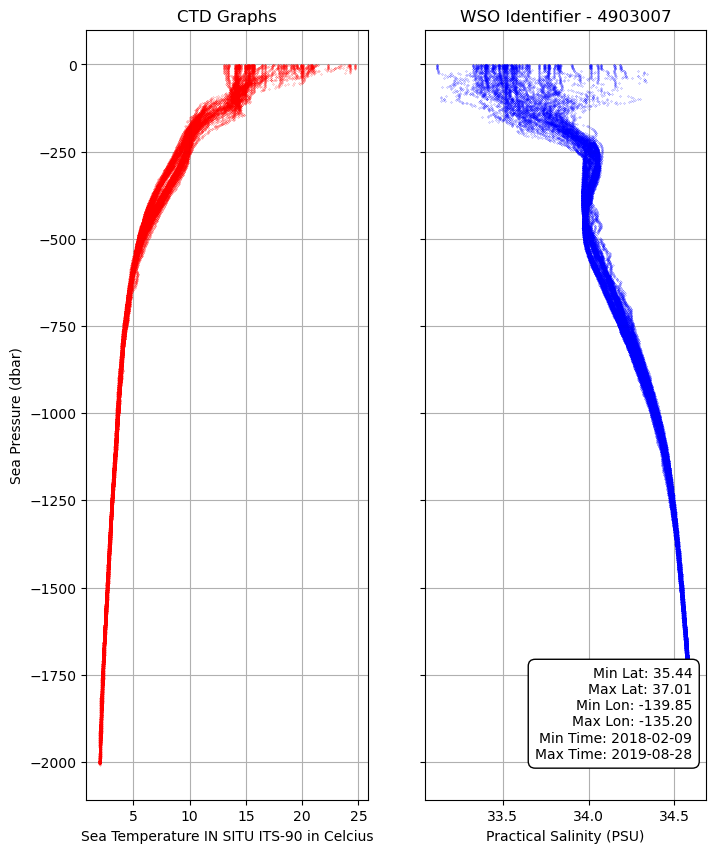

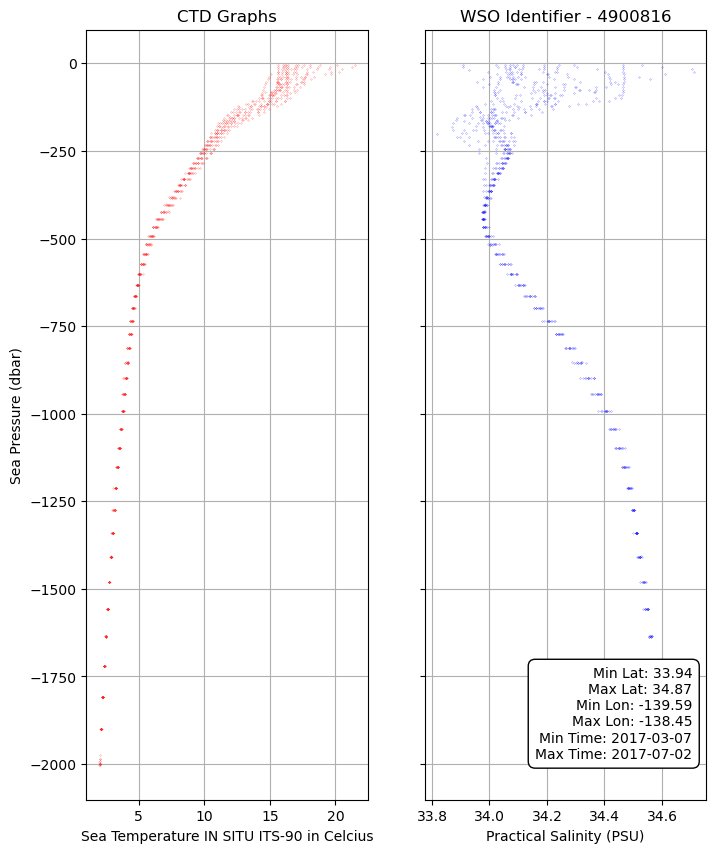

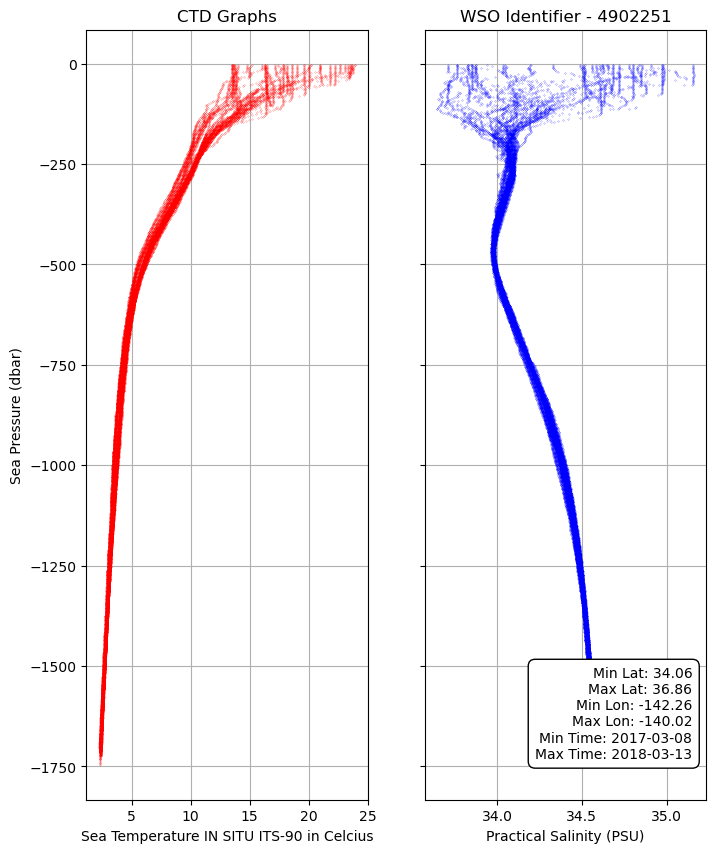

In [36]:
import pandas as pd
#Some commented out features were other ways of representing information that I did not care for.

#legend_labels_temp = []
#legend_labels_salinity = []

for i, sliced_data in enumerate(sliced_data_list):
    
    fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True) 

    #Calculate the max and min latitude and longitude values!
    max_lat = sliced_data.LATITUDE.max().values
    min_lat = sliced_data.LATITUDE.min().values
    max_lon = sliced_data.LONGITUDE.max().values
    min_lon = sliced_data.LONGITUDE.min().values
    min_time = pd.to_datetime(sliced_data.TIME.min().values).strftime('%Y-%m-%d')
    max_time = pd.to_datetime(sliced_data.TIME.max().values).strftime('%Y-%m-%d')


    #Calculate the number of profiles DIMENSION!
    n_prof_value = sliced_data.N_PROF.values[0]
    
    #Temperature
    ax[0].plot(sliced_data.TEMP,-sliced_data.PRES,'ro', markersize=.15)
    ax[0].set_xlabel('Sea Temperature IN SITU ITS-90 in Celcius') 
    ax[0].set_ylabel('Sea Pressure (dbar)')
    ax[0].set_title('CTD Graphs')
    ax[0].grid()
   
    #Salinity
    ax[1].plot(sliced_data.PSAL,-sliced_data.PRES,'bo', markersize=.15)
    ax[1].set_title(f"WSO Identifier - {a_values[i]}")
    ax[1].set_xlabel('Practical Salinity (PSU)')
    ax[1].grid()

    #Create the legend labels for each plot
    #legend_label_temp = f'Temperature: N_PROF={n_prof_value}, Min Lat={min_lat:.2f}, Max Lat={max_lat:.2f}, Min Lon={min_lon:.2f}, Max Lon={max_lon:.2f}'
    #legend_label_salinity = f'Salinity: N_PROF={n_prof_value}, Min Lat={min_lat:.2f}, Max Lat={max_lat:.2f}, Min Lon={min_lon:.2f}, Max Lon={max_lon:.2f}'

    #Append the legend labels to the lists
    #legend_labels_temp.append(legend_label_temp)
    #legend_labels_salinity.append(legend_label_salinity)

    #Provide a text box with important information like lat, lon, and the number of profiles!
    text_plot = f"Min Lat: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}"
    ax[1].text(0.95, 0.05, text_plot, transform=ax[1].transAxes, ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    #Will later provide trajectory plots w/ bounding boxes of SMILE + the designated CTD data!
    #fig, ax = argo_loader.plot('trajectory', figsize=(10, 10), cmap='white')
    #ds['elevation'].plot.contourf(levels=np.arange(-6000,0,100), ax=ax, add_colorbar=True, cmap='YlGnBu')
    

#ax[0].legend(legend_labels_temp, loc='upper left')
#ax[1].legend(legend_labels_salinity, loc='upper left')

Understanding what we are looking at (i.e. how many profiles per float satisfied the conditions?)
1. 5903608, N_PROF = 90
2. 5904128, N_PROF = 27
3. 5904977, N_PROF = 91
4. 4902149, N_PROF = 91
5. 4902947, N_PROF = 75
6. 4902935, N_PROF = 76
7. 5903603, N_PROF = 90
8. 4903007, N_PROF = 61
9. 4900816, N_PROF = 12
10. 4902251, N_PROF = 34

In [37]:
sliced_data_dict

{5903608: <xarray.Dataset>
 Dimensions:          (N_PROF: 90, N_LEVELS: 71)
 Coordinates:
   * N_PROF           (N_PROF) int32 192 193 194 195 196 ... 277 278 279 280 281
   * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
     LATITUDE         (N_PROF) float64 25.33 25.26 25.53 ... 26.74 26.76 26.8
     LONGITUDE        (N_PROF) float64 -145.8 -145.5 -145.4 ... -144.9 -144.8
   * TIME             (N_PROF) datetime64[ns] 2017-03-06T07:39:03 ... 2019-08-...
 Data variables: (12/15)
     CYCLE_NUMBER     (N_PROF) int32 193 194 195 196 197 ... 278 279 280 281 282
     DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
     DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
     PLATFORM_NUMBER  (N_PROF) int32 5903608 5903608 5903608 ... 5903608 5903608
     POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
     PRES             (N_PROF, N_LEVELS) float32 5.9 9.8 19.3 ... 1.949e+03 2e+03
   

In [38]:
sliced_data_dict[5903608]

<xarray.Dataset>
Dimensions:          (N_PROF: 90, N_LEVELS: 71)
Coordinates:
  * N_PROF           (N_PROF) int32 192 193 194 195 196 ... 277 278 279 280 281
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
    LATITUDE         (N_PROF) float64 25.33 25.26 25.53 ... 26.74 26.76 26.8
    LONGITUDE        (N_PROF) float64 -145.8 -145.5 -145.4 ... -144.9 -144.8
  * TIME             (N_PROF) datetime64[ns] 2017-03-06T07:39:03 ... 2019-08-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int32 193 194 195 196 197 ... 278 279 280 281 282
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5903608 5903608 5903608 ... 5903608 5903608
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 5.9 9.8 19.3 ... 1.949e+03 2e+03
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 0.01 0.01 0.01 ... 0.01 0.01
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 22.3 22.31 22.31 ... 2.219 2.16
    TEMP_ERROR       (N_PROF) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [39]:
#I would like to do a line of best fit or Mean/average line based on all these profiles too...maybe!